In [1]:
# %matplotlib widget

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from lvmdrp import log, path, __version__ as drpver
from lvmdrp.utils import metadata as md

from lvmdrp.core.constants import ARC_LAMPS, SPEC_CHANNELS
from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod


ORIG_MASTER_DIR = os.getenv("LVM_MASTER_DIR")

In [2]:
frames_table = md.get_metadata(tileid="*", mjd=60177)
frames_table.query("imagetyp == 'bias' | imagetyp == 'dark' | imagetyp == 'flat' | imagetyp == 'arc'", inplace=True)
frames_table = frames_table.loc[frames_table.name.str.contains("sdR")]

[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/raw_metadata.hdf5
[INFO]: found 552 frames in store '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/raw_metadata.hdf5'
[INFO]: number of frames after filtering 552
[INFO]: total number of frames found 552


In [3]:
masters_mjd = frames_table.mjd.min()
masters_path = os.path.join(ORIG_MASTER_DIR, f"{masters_mjd}")
os.makedirs(masters_path, exist_ok=True)

In [4]:
marc_paths = [os.path.join(masters_path, file) for file in os.listdir(masters_path) if file.startswith("lvm-marc")]
masters_arc = md.extract_metadata(marc_paths).sort_values("camera")
masters_arc

[INFO]: going to extract metadata from 9 frames
extracting metadata: 100%|#################################################################################| 9/9 [00:00<00:00, 242.08frame/s]
[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/raw_metadata.hdf5
[INFO]: updating metadata store for tileid = 1111 and mjd = 60177 with 0 new rows
[INFO]: final number of rows 552
[INFO]: writing raw metadata store to disk


hemi  tileid    mjd   rmjd imagetyp spec camera  expnum  exptime   neon  \
3    s    1111  60177  60177      arc  sp1     b1    3463    150.0  False   
0    s    1111  60177  60177      arc  sp2     b2    3464    150.0  False   
2    s    1111  60177  60177      arc  sp3     b3    3463    150.0  False   
7    s    1111  60177  60177      arc  sp1     r1    3457     10.0   True   
5    s    1111  60177  60177      arc  sp2     r2    3458     10.0   True   
6    s    1111  60177  60177      arc  sp3     r3    3459    150.0   True   
1    s    1111  60177  60177      arc  sp1     z1    3458     10.0   True   
4    s    1111  60177  60177      arc  sp2     z2    3458     10.0   True   
8    s    1111  60177  60177      arc  sp3     z3    3459    150.0   True   

   ...  xenon  argon   ldls  quartz    quality  qual stage  status  drpqual  \
3  ...  False  False  False   False  excellent     0     1       0        0   
0  ...  False  False  False   False  excellent     0     1       0        0   
2  ...  False  False  False   False  excellent     0     1       0        0   
7  ...  False  False  False   False  excellent     0     1       0        0   
5  ...  False  False  False   False  excellent     0     1       0        0   
6  ...  False  False  False   False  excellent     0     1       0  4194304   
1  ...  False  False  False   False  excellent     0     1       0        0   
4  ...  False  False  False   False  excellent     0     1       0        0   
8  ...  False  False  False   False  excellent     0     1       0        0   

               name  
3  lvm-marc_hgne-b1  
0  lvm-marc_hgne-b2  
2  lvm-marc_hgne-b3  
7  lvm-marc_neon-r1  
5  lvm-marc_neon-r2  
6  lvm-marc_neon-r3  
1  lvm-marc_neon-z1  
4  lvm-marc_neon-z2  
8  lvm-marc_neon-z3  

[9 rows x 22 columns]

[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_hgne-b1.fits'
[INFO]: loading reference lines for lamp = 'hgne' in camera = 'b1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: running cross matching on 6 good lines
[INFO]: max CC = 0.67 for strech = 1.00 and shift = 0.00
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1e-12, fwhm_max = 5 and relative flux limits [0.001, 1000000000000.0]
measuring 

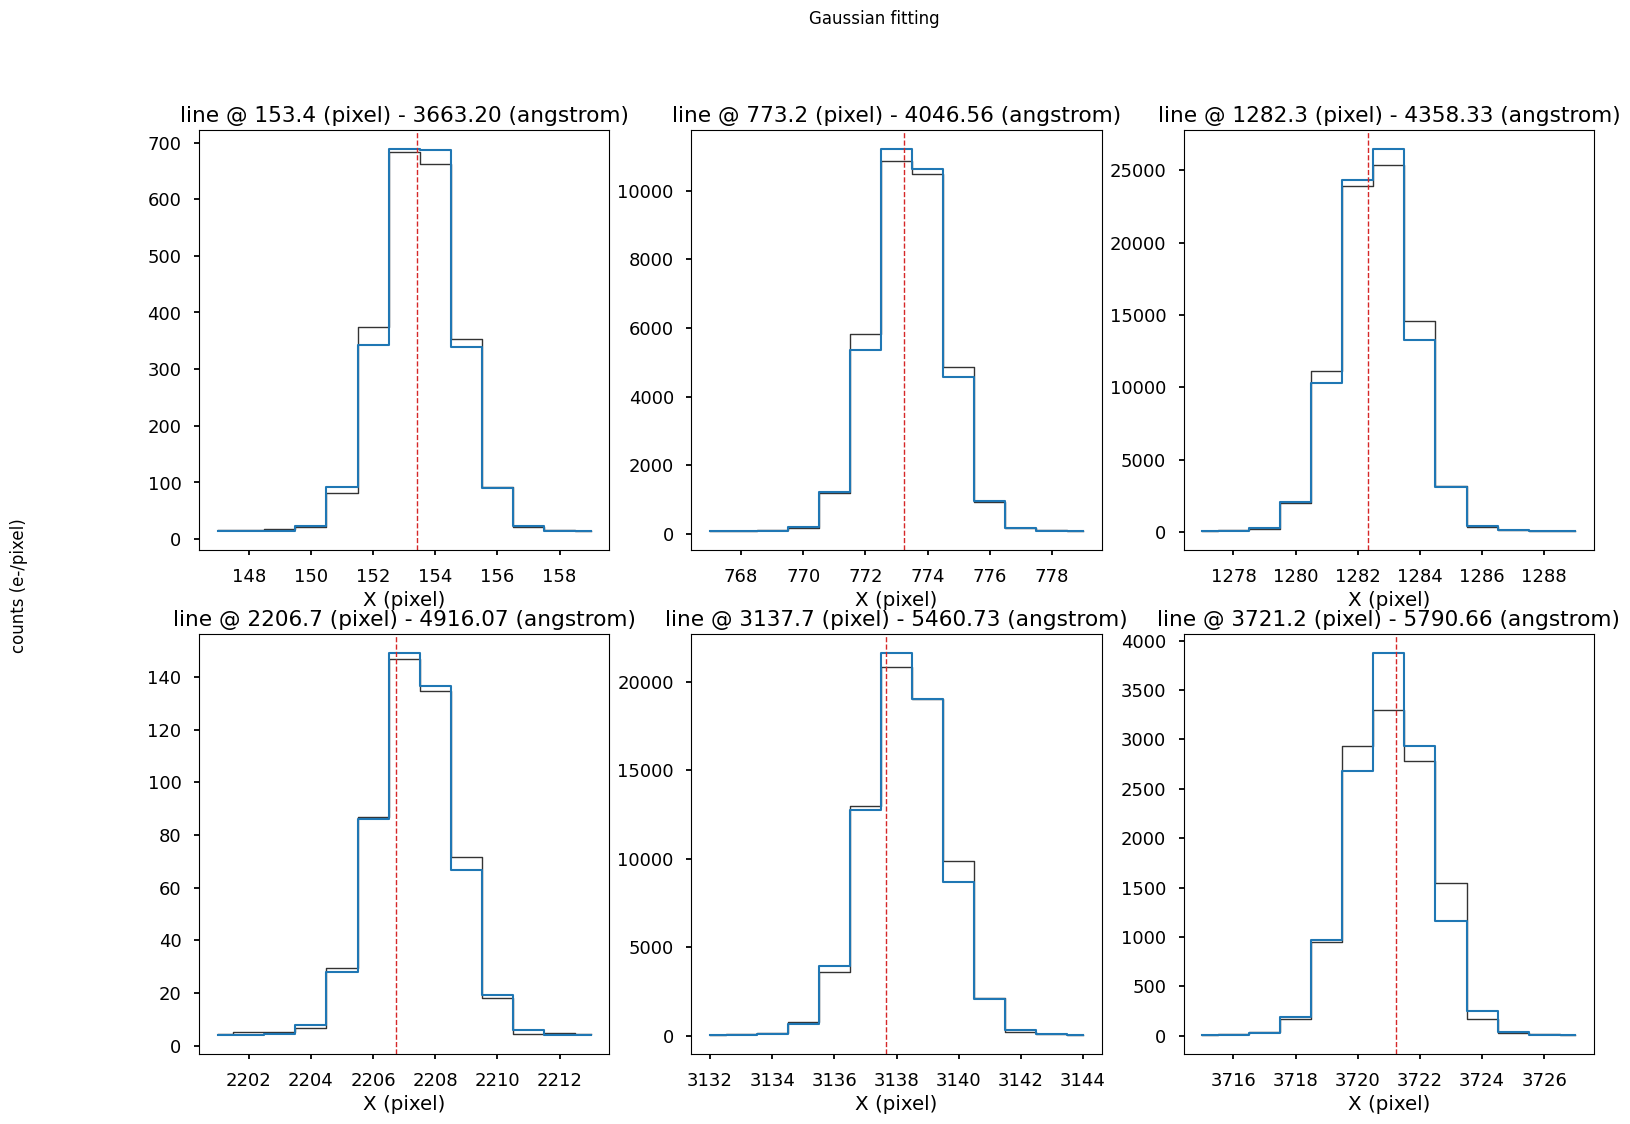

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 414 has all lines masked
[WARNING]: fiber 462 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0720343 AA (0.121799 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0460841 AA (0.0775601 pix)


<Figure size 1040x715 with 0 Axes>

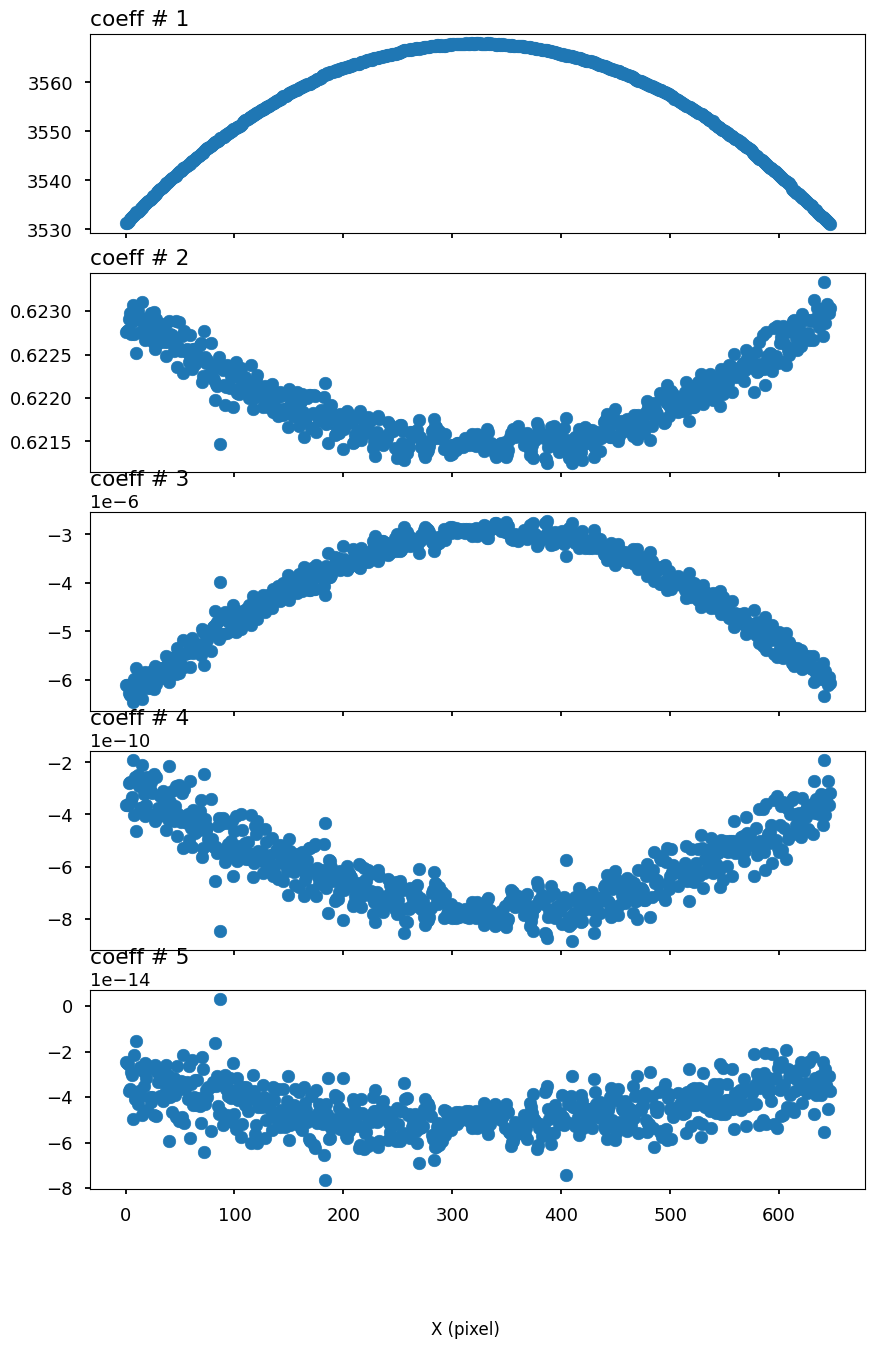

<Figure size 1040x715 with 0 Axes>

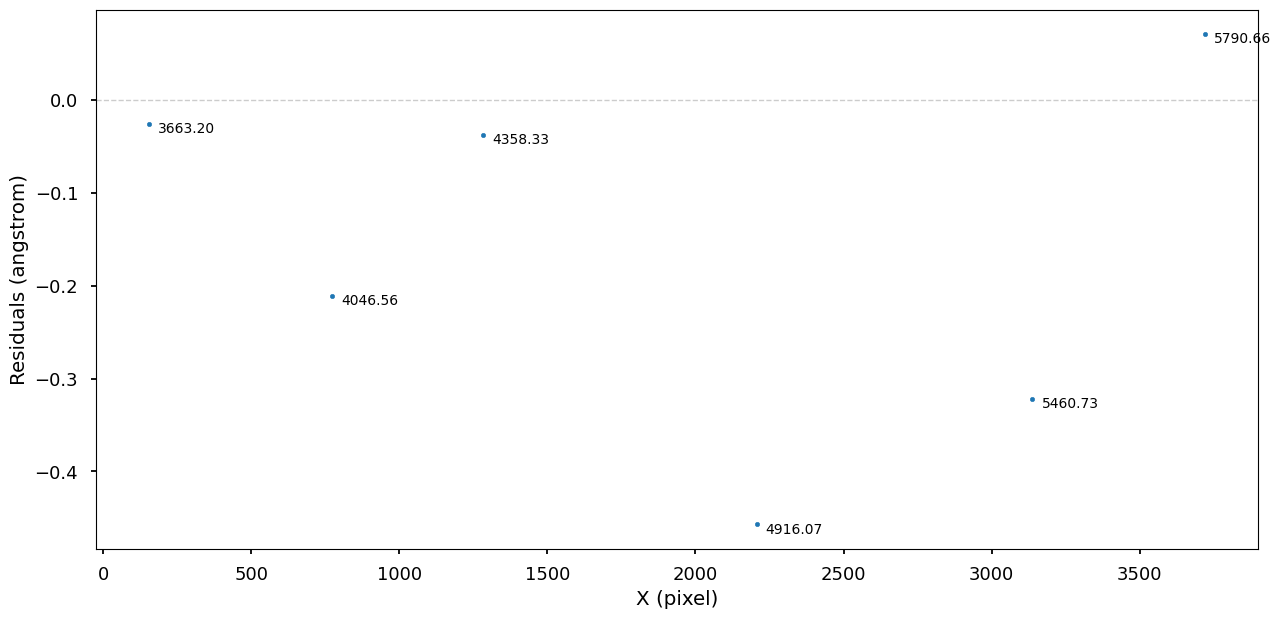

<Figure size 1040x715 with 0 Axes>

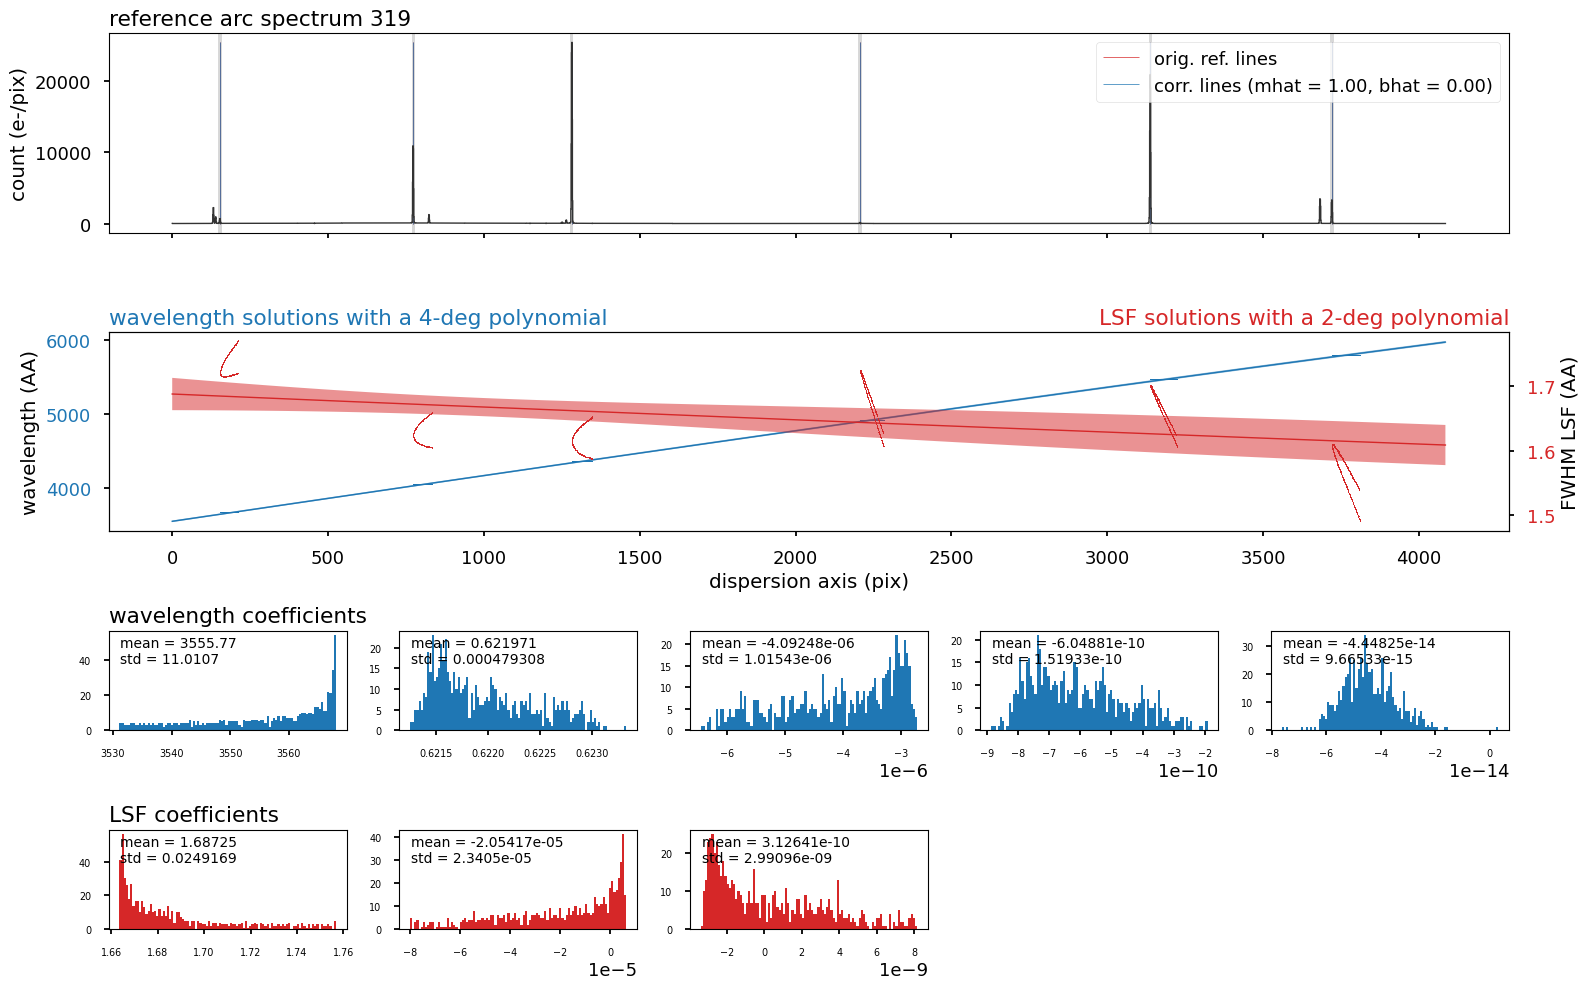

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_hgne-b1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_hgne-b1.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_hgne-b2.fits'
[INFO]: loading reference lines for lamp = 'hgne' in camera = 'b2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]:

<Figure size 1040x715 with 0 Axes>

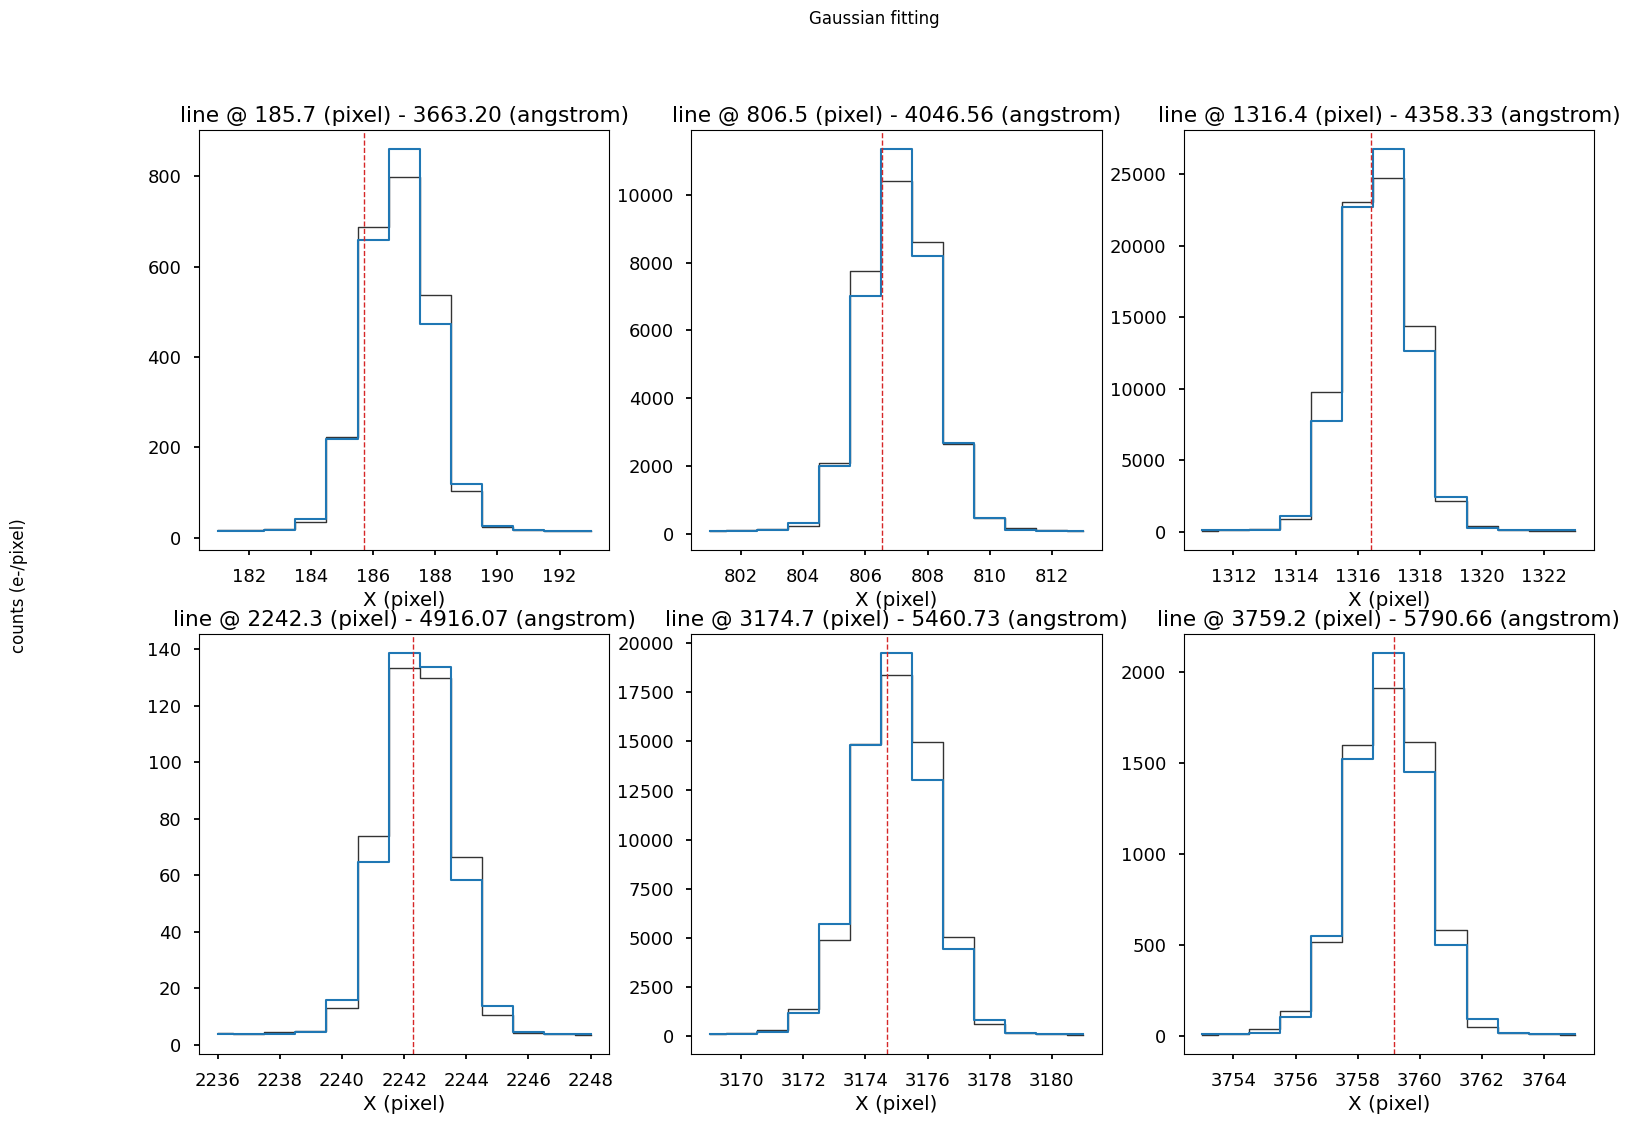

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 557 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0710406 AA (0.119906 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0312078 AA (0.0529331 pix)


<Figure size 1040x715 with 0 Axes>

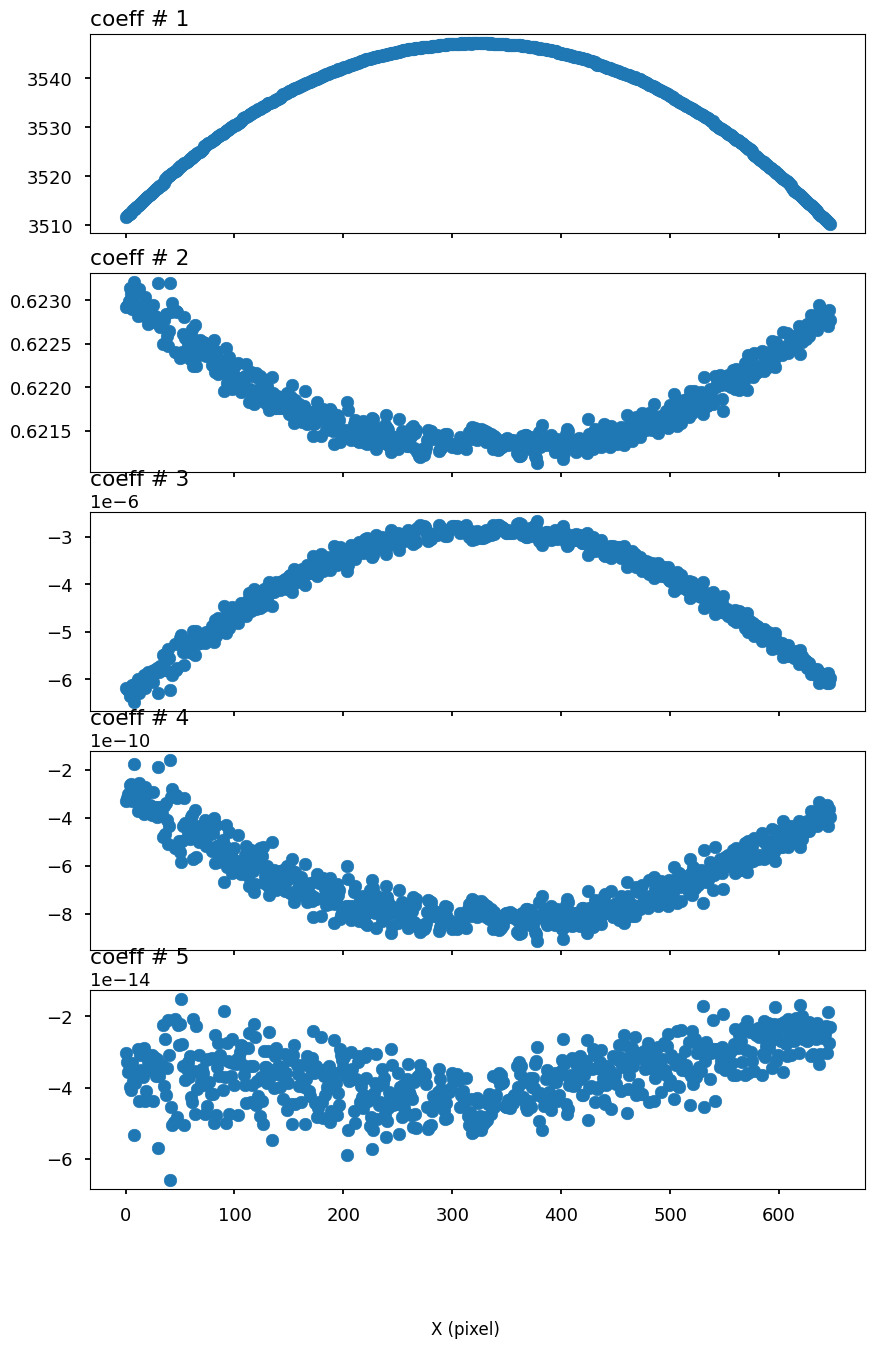

<Figure size 1040x715 with 0 Axes>

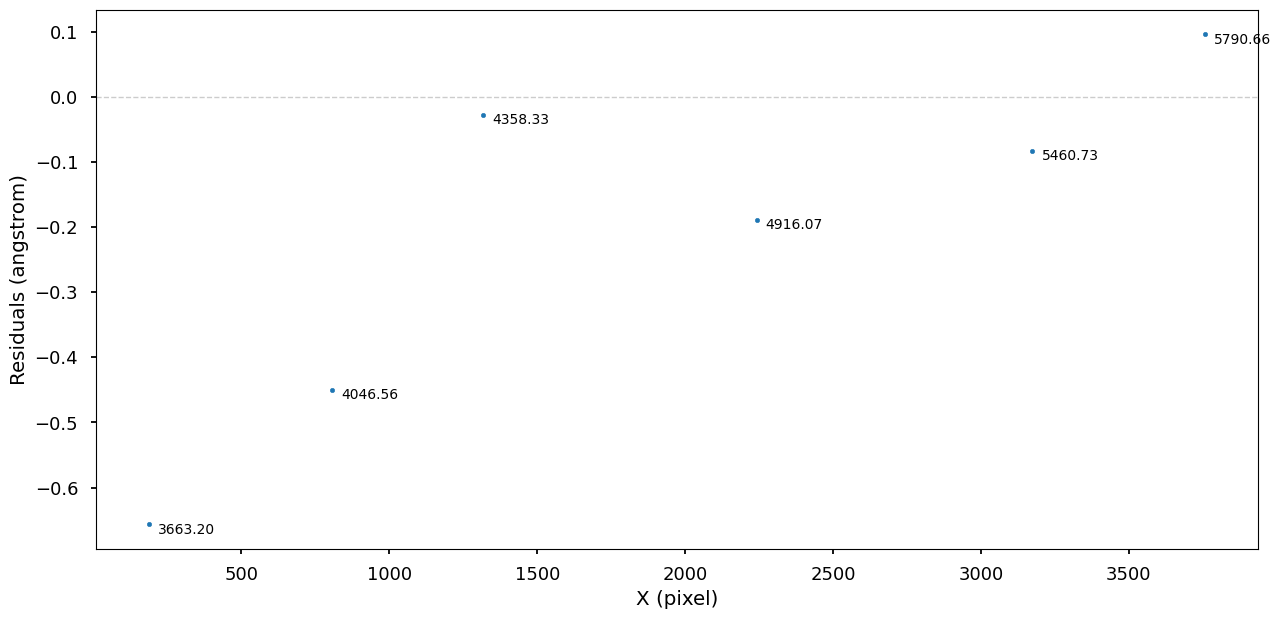

<Figure size 1040x715 with 0 Axes>

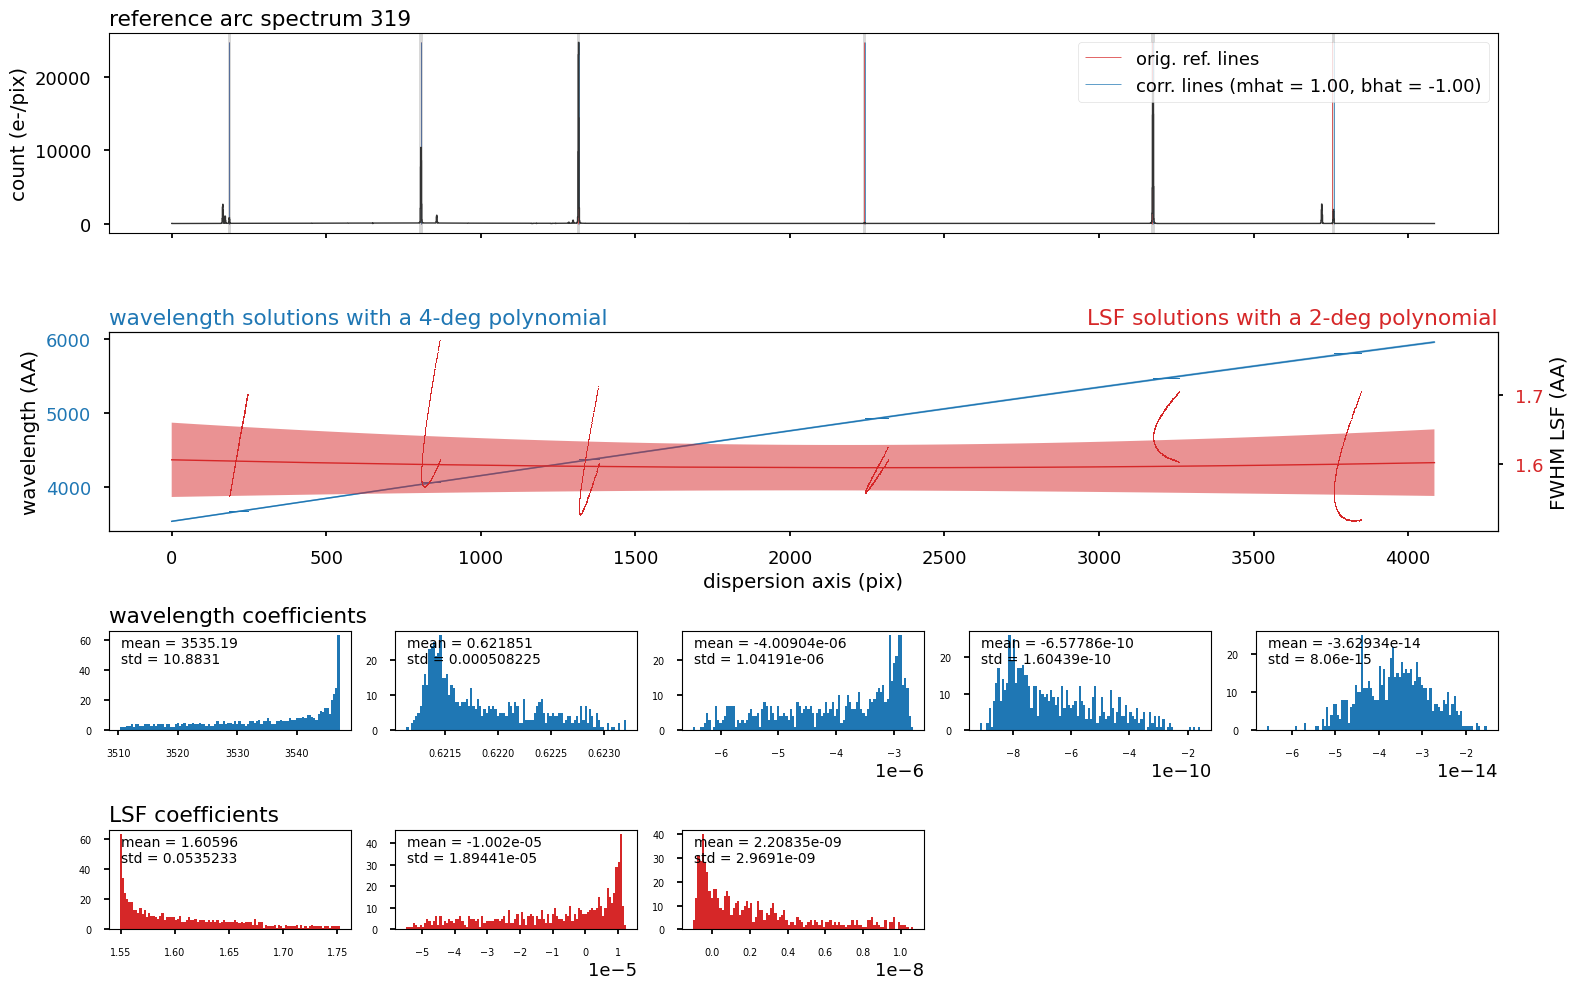

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_hgne-b2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_hgne-b2.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_hgne-b3.fits'
[INFO]: loading reference lines for lamp = 'hgne' in camera = 'b3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-hgne_b3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 11 percentage masked  45.4545 %
[INFO]: going to use 6 lines
[INFO]:

<Figure size 1040x715 with 0 Axes>

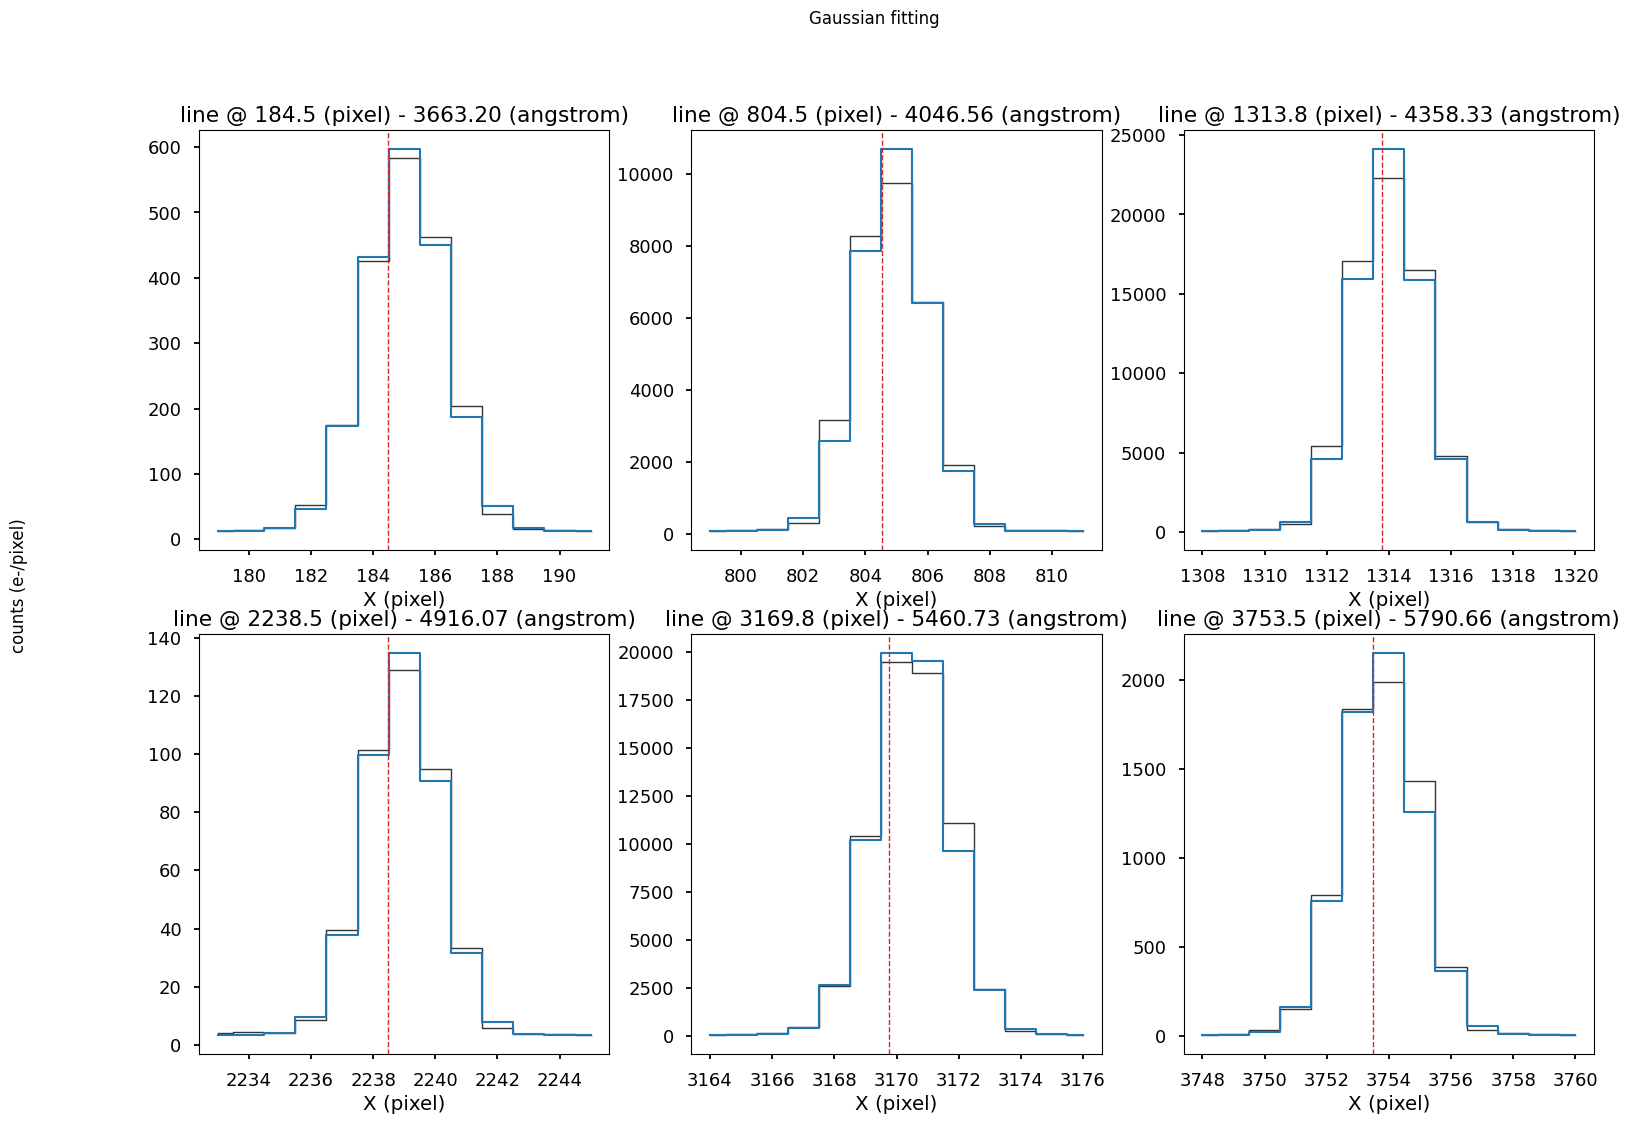

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 447 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 556 has all lines masked
[WARNING]: fiber 575 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0754913 AA (0.127509 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0688591 AA (0.115987 pix)


<Figure size 1040x715 with 0 Axes>

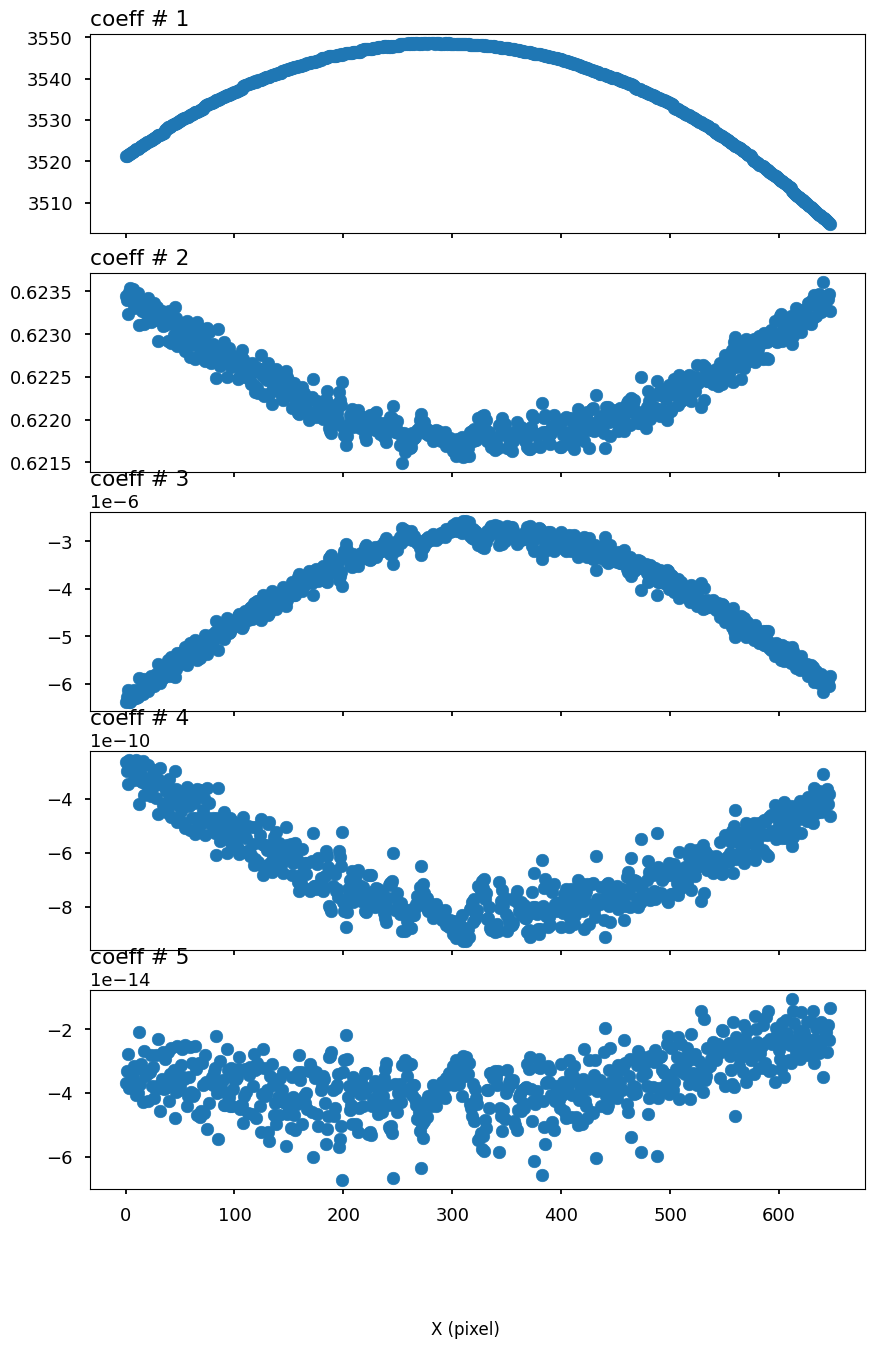

<Figure size 1040x715 with 0 Axes>

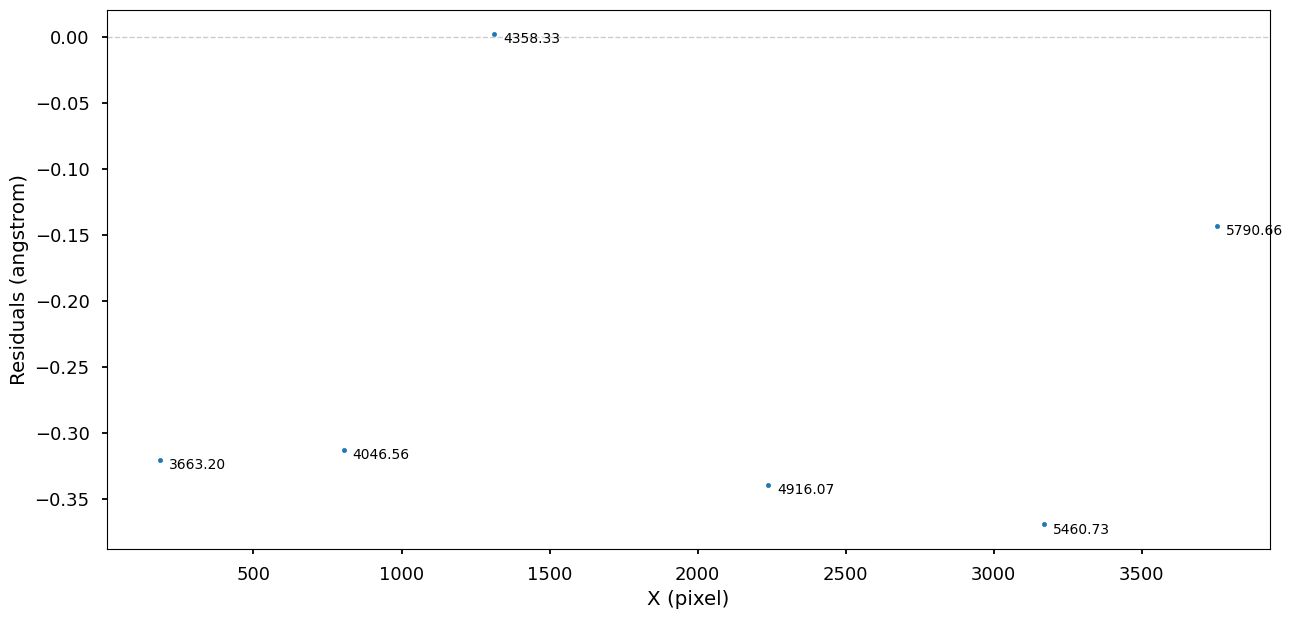

<Figure size 1040x715 with 0 Axes>

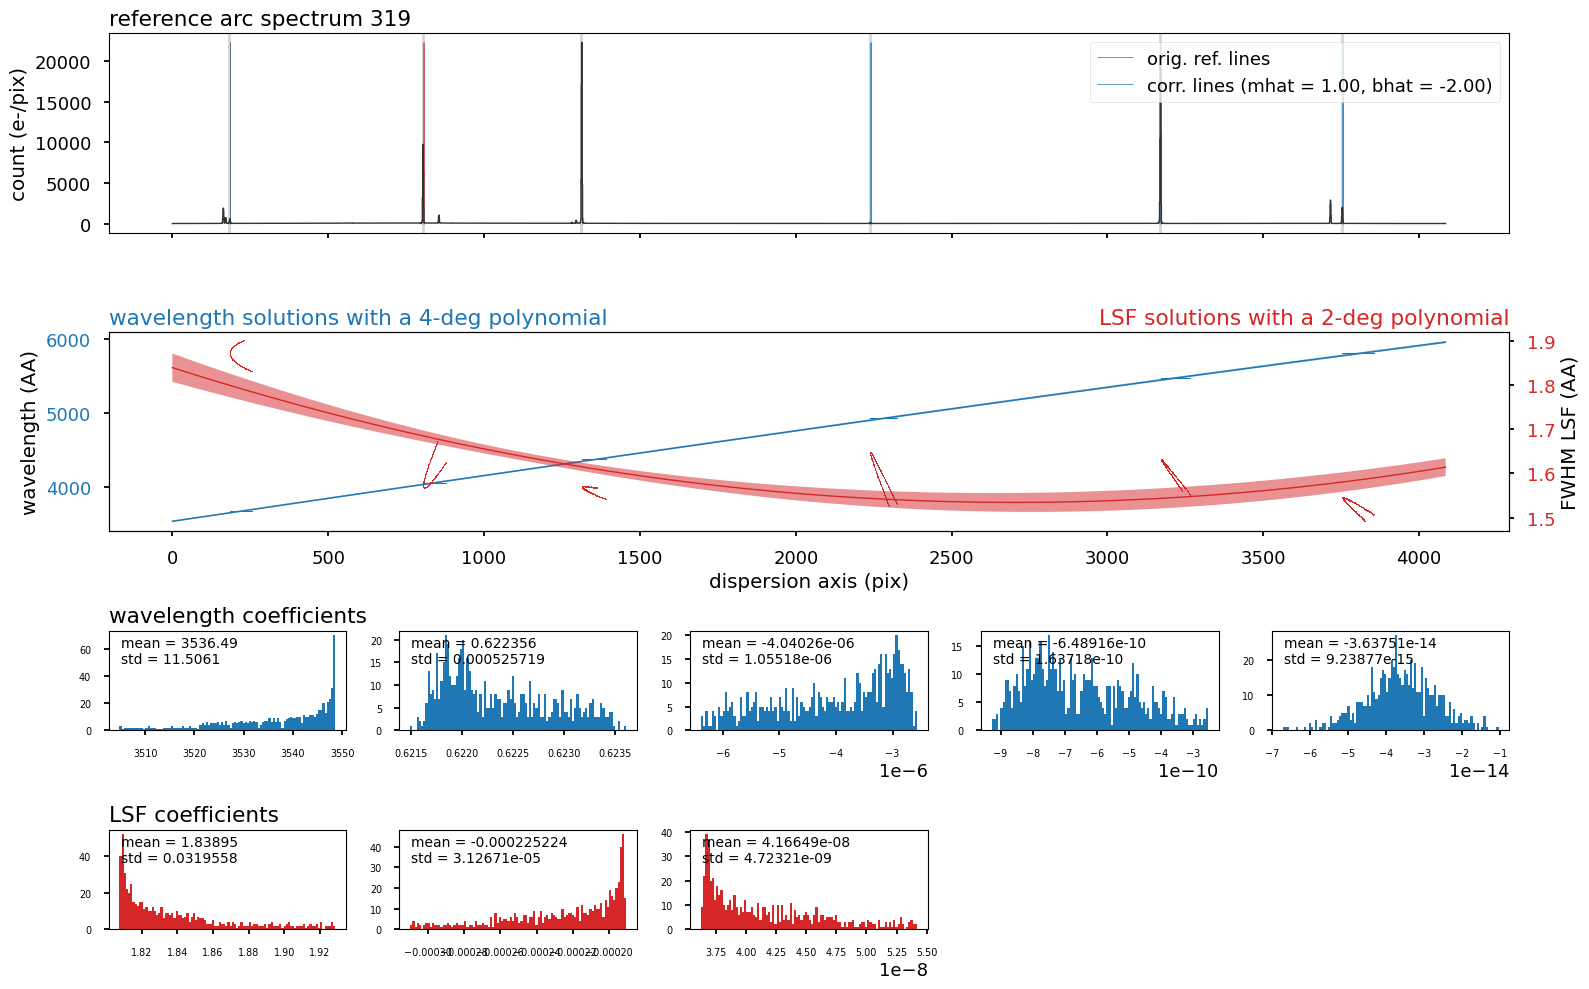

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_hgne-b3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_hgne-b3.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  73.5294 %
[INFO]: going to use 9 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_neon-r1.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  73.5294 %
[INFO]: going to use 9 lines
[INFO]:

<Figure size 1040x715 with 0 Axes>

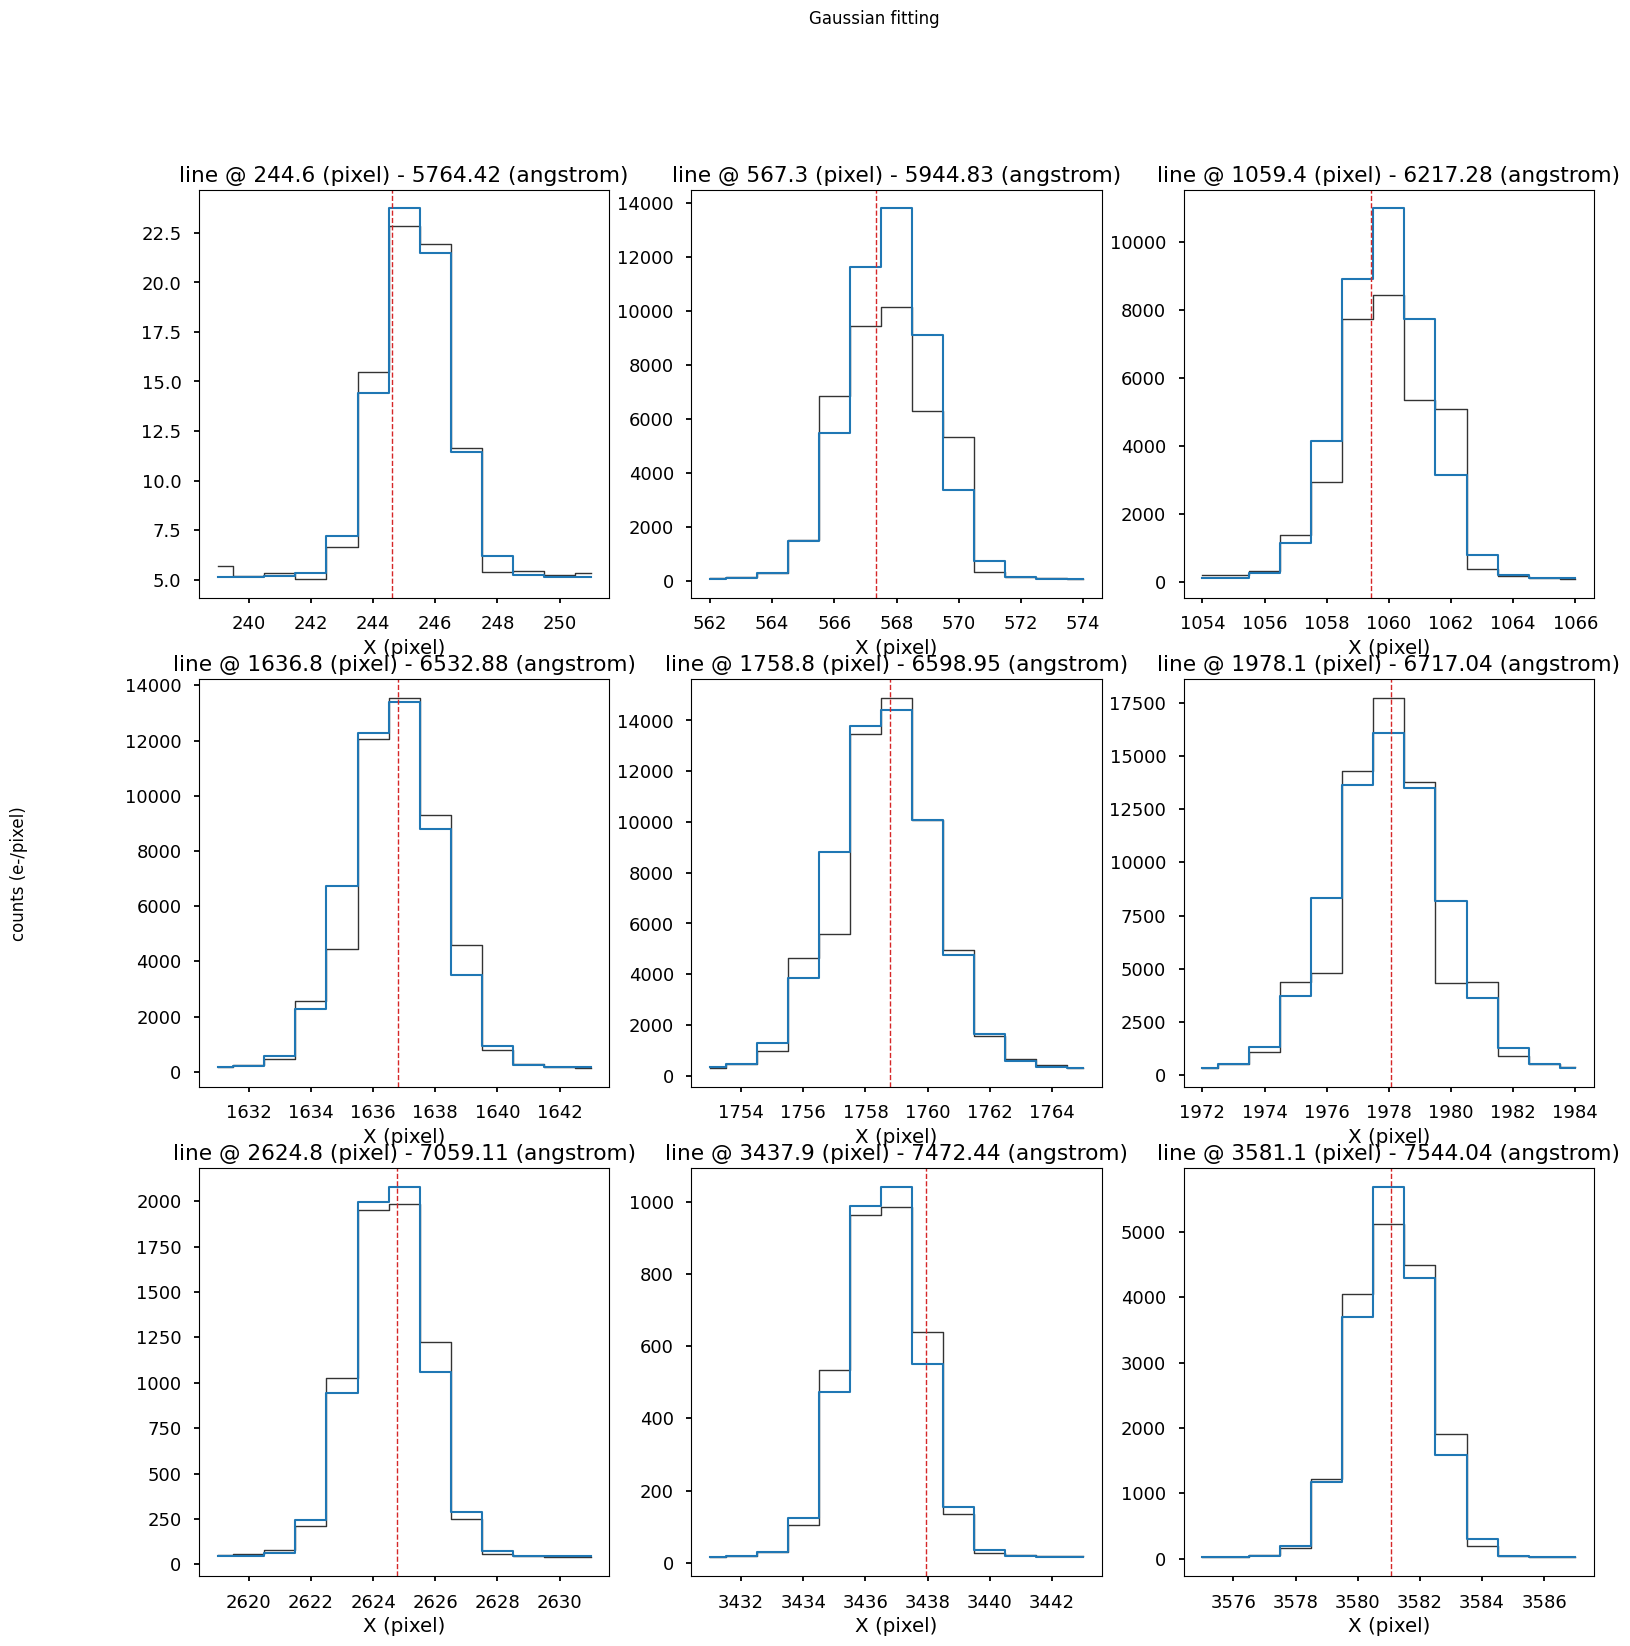

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 5-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 414 has all lines masked
[WARNING]: fiber 462 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0428764 AA (0.0811697 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.144164 AA (0.2718 pix)


<Figure size 1040x715 with 0 Axes>

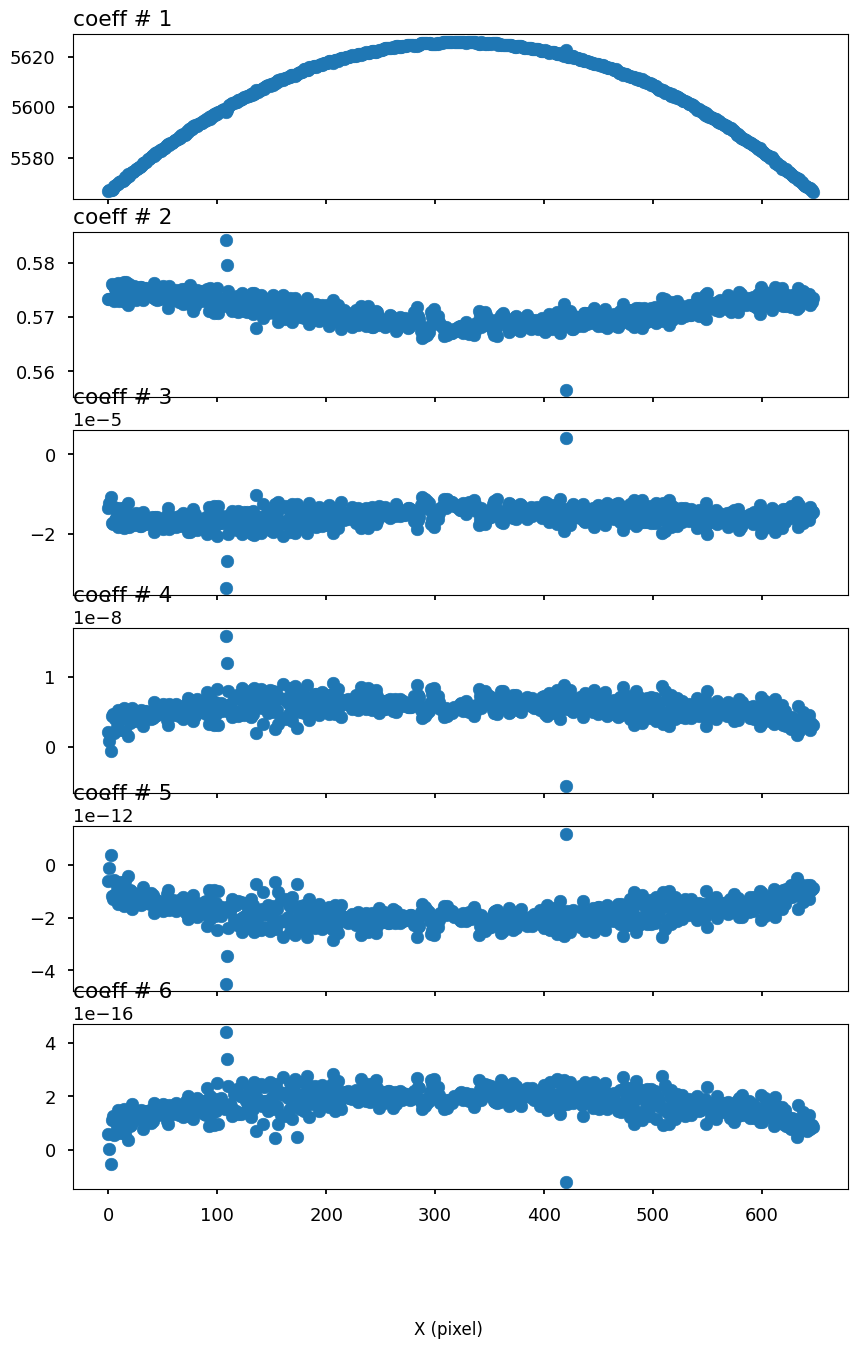

<Figure size 1040x715 with 0 Axes>

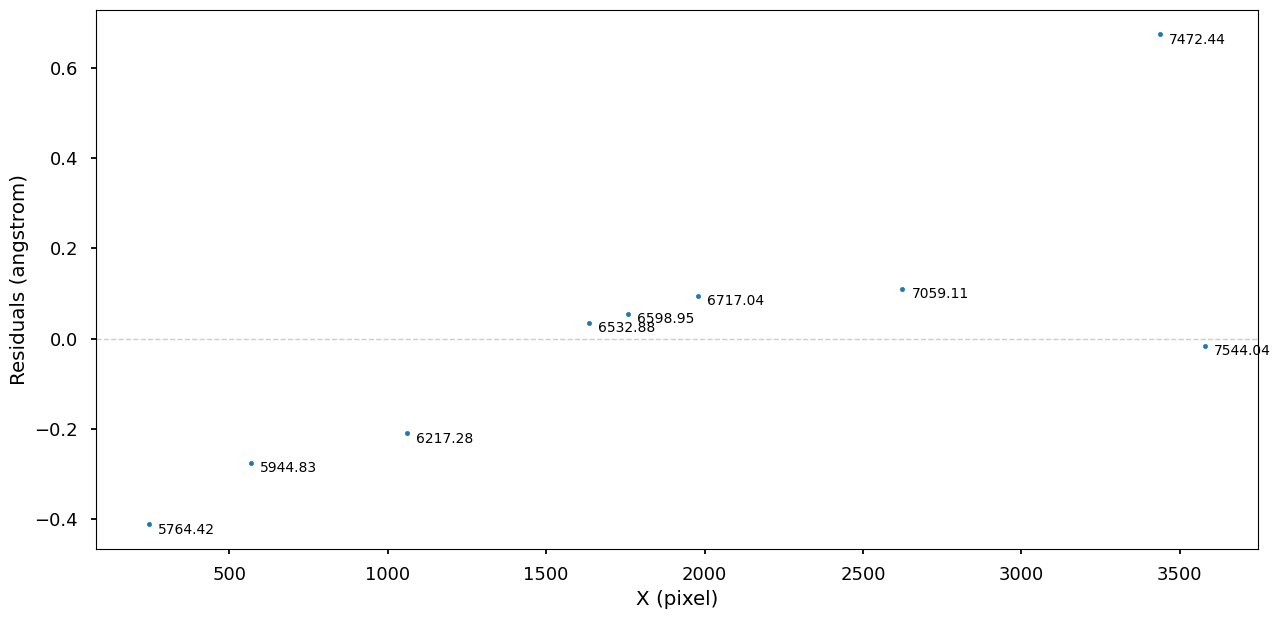

<Figure size 1040x715 with 0 Axes>

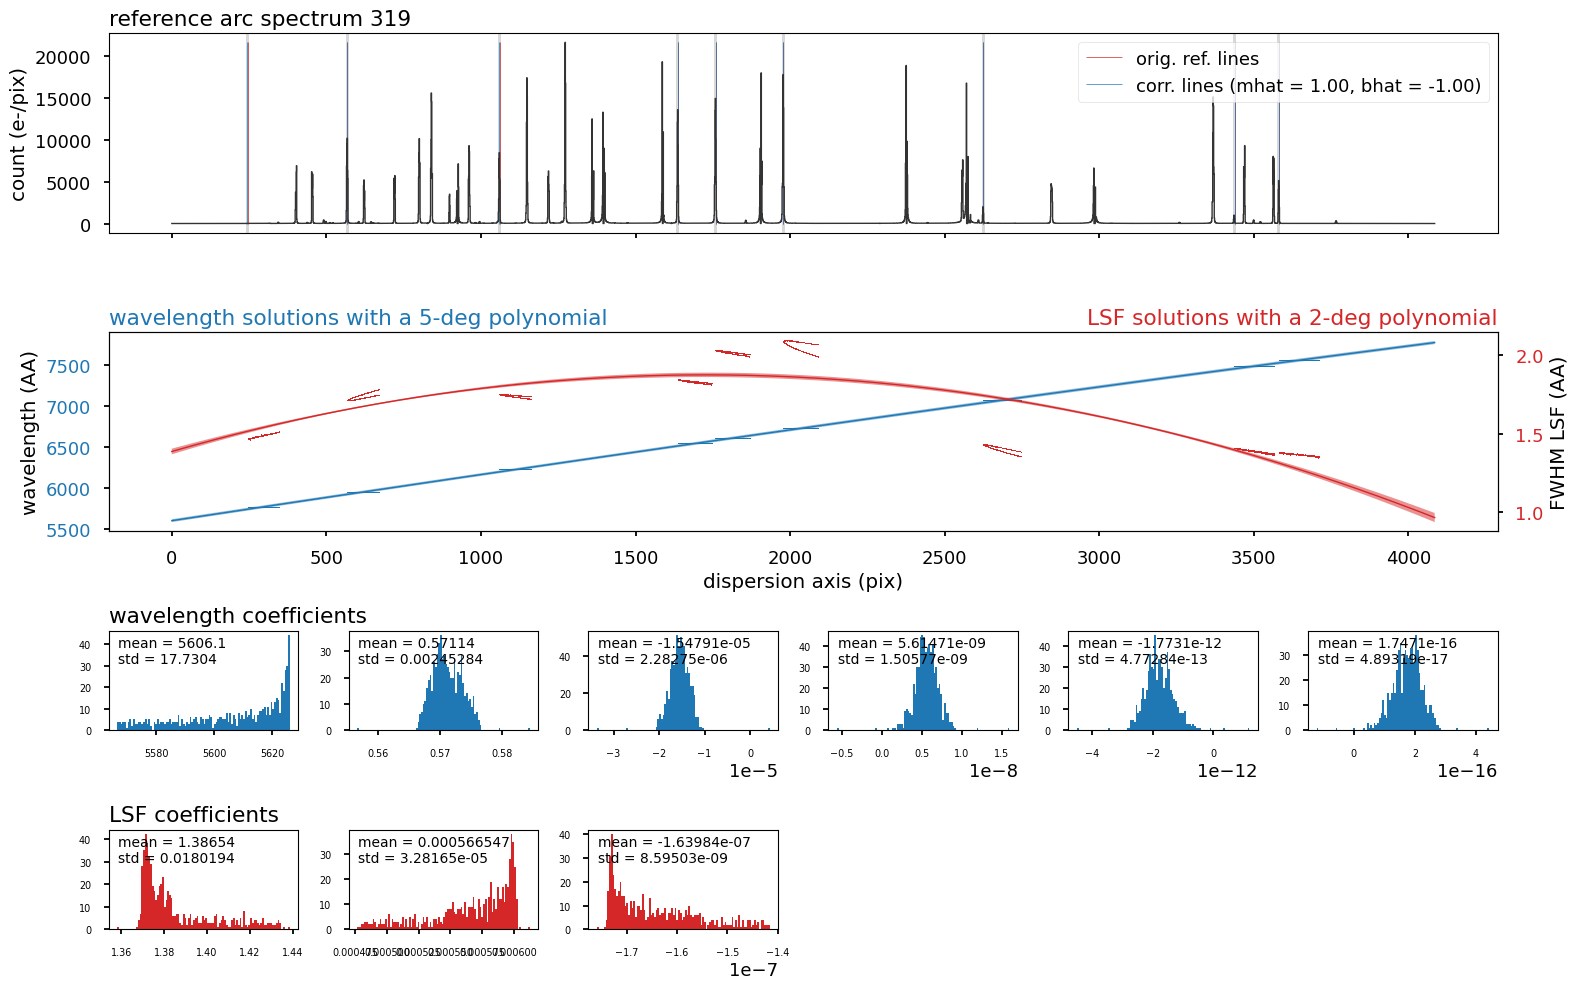

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-r1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-r1.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  67.6471 %
[INFO]: going to use 11 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_neon-r2.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  67.6471 %
[INFO]: going to use 11 lines
[INFO

<Figure size 1040x715 with 0 Axes>

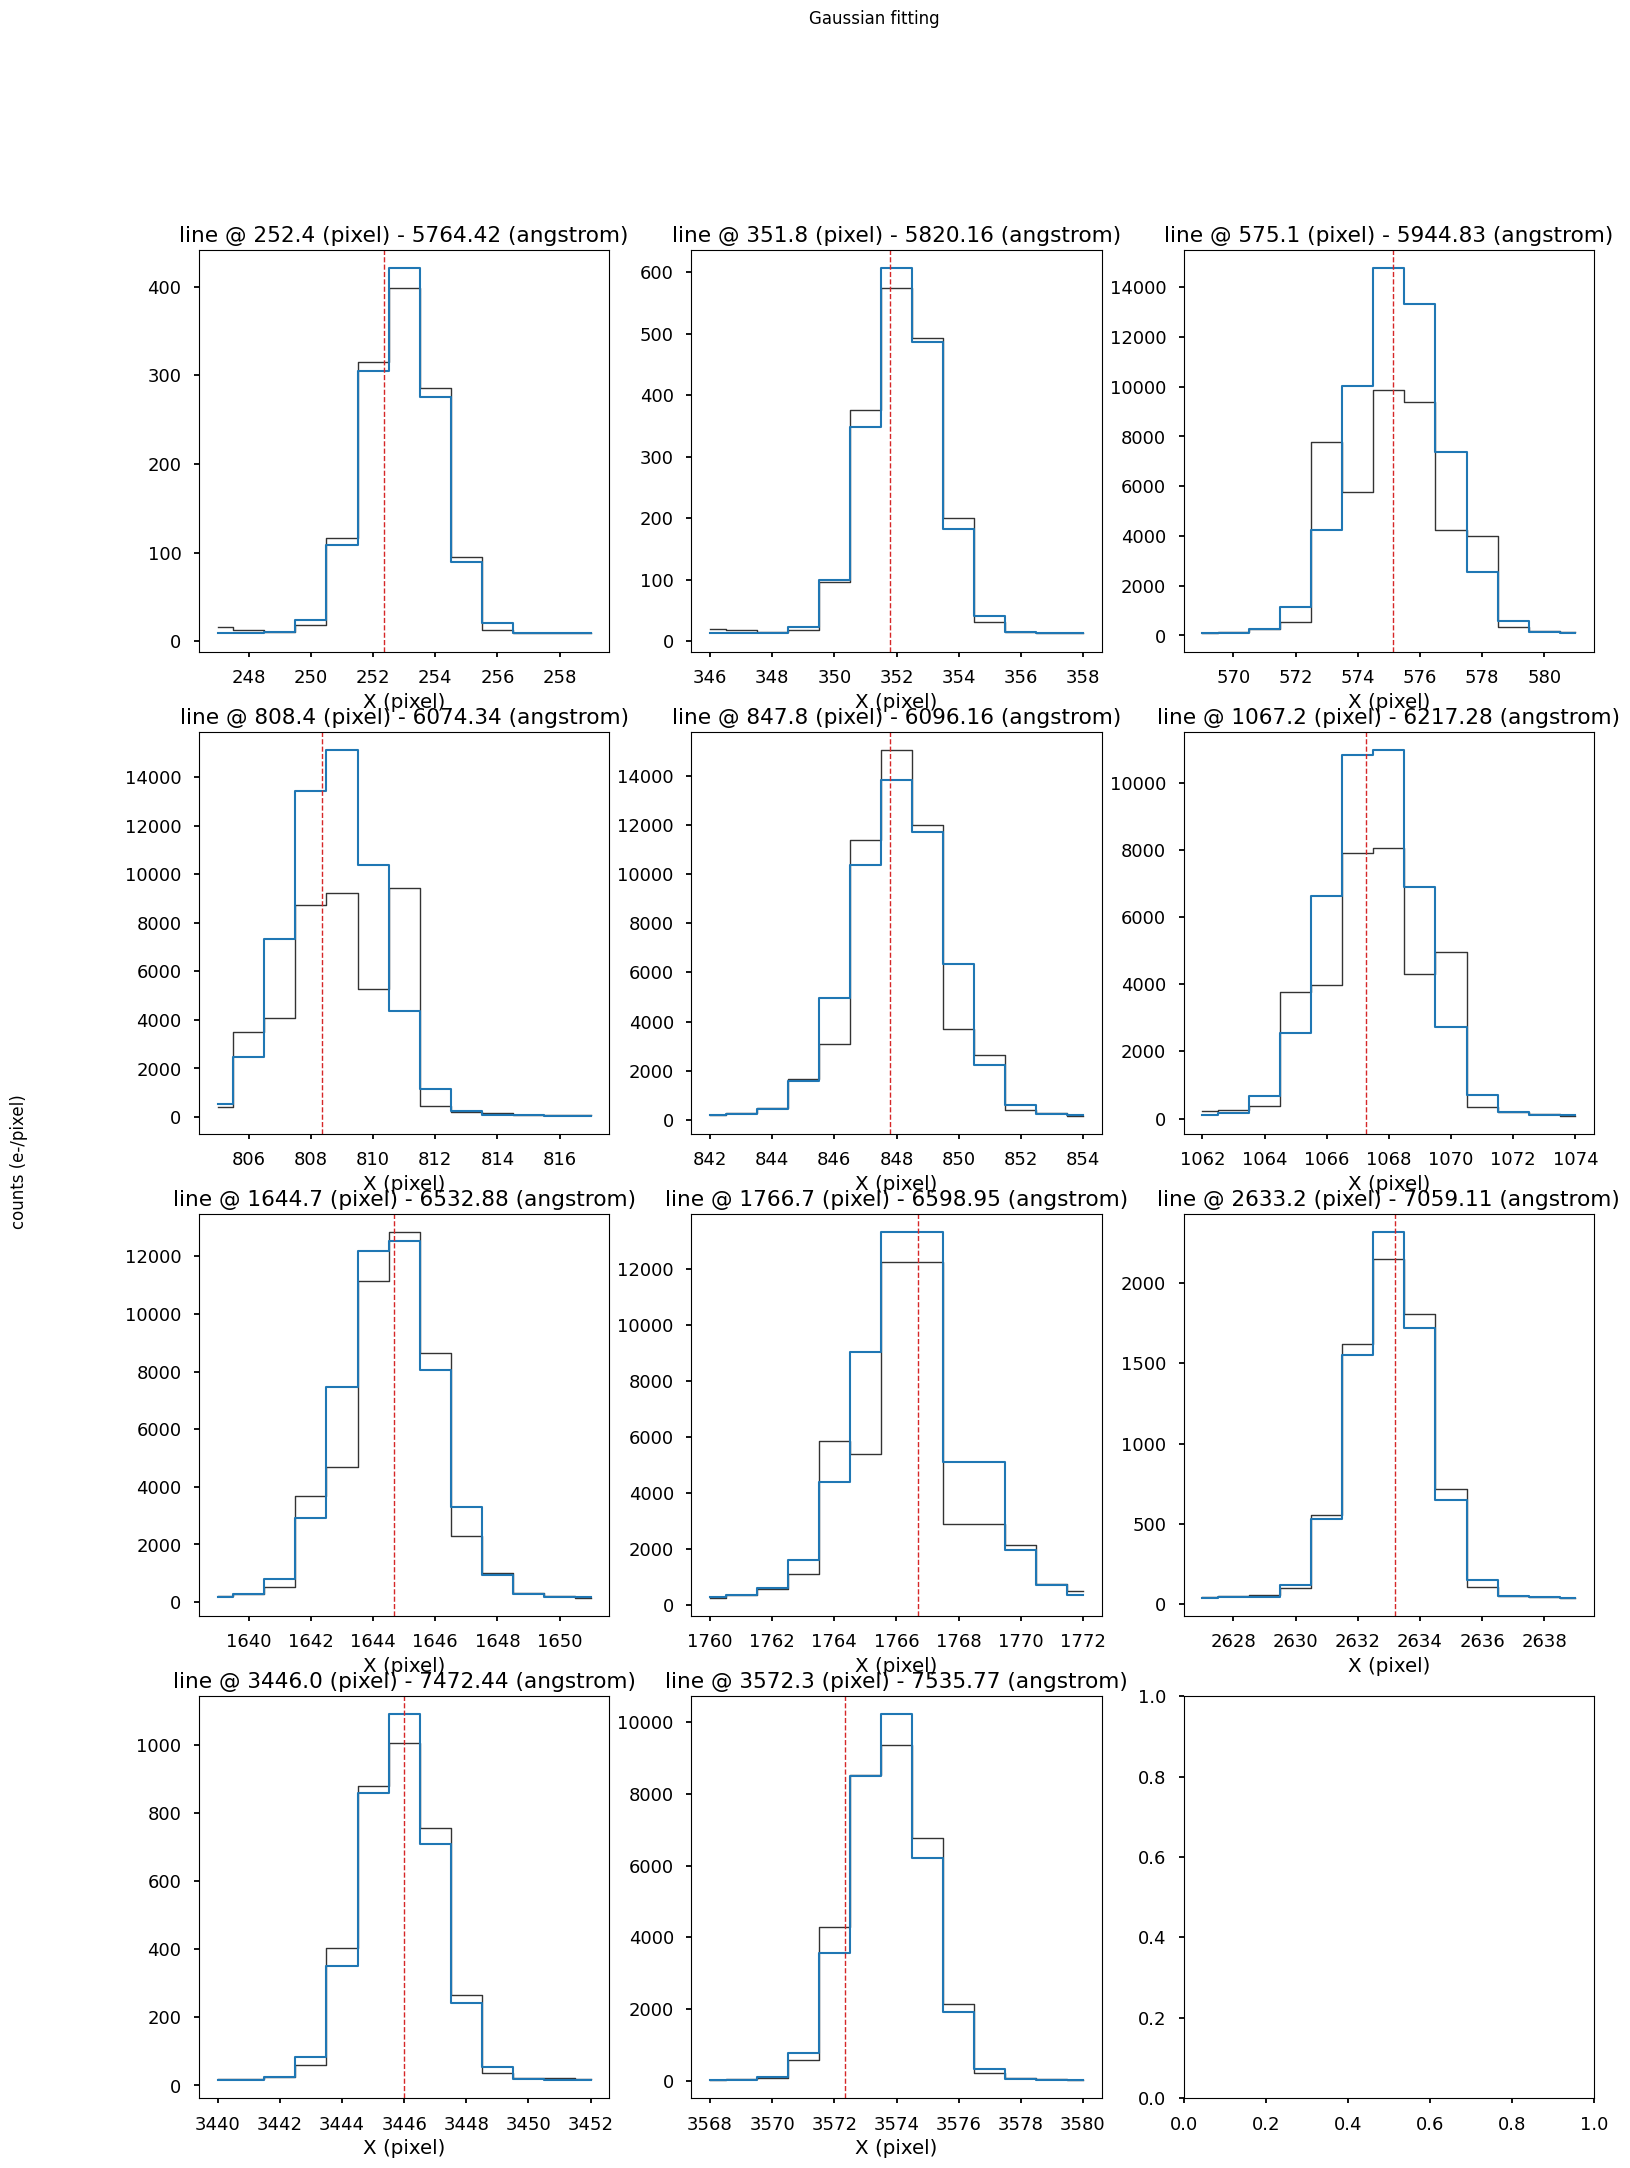

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 6-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 557 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0413403 AA (0.0786014 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.136517 AA (0.257792 pix)


<Figure size 1040x715 with 0 Axes>

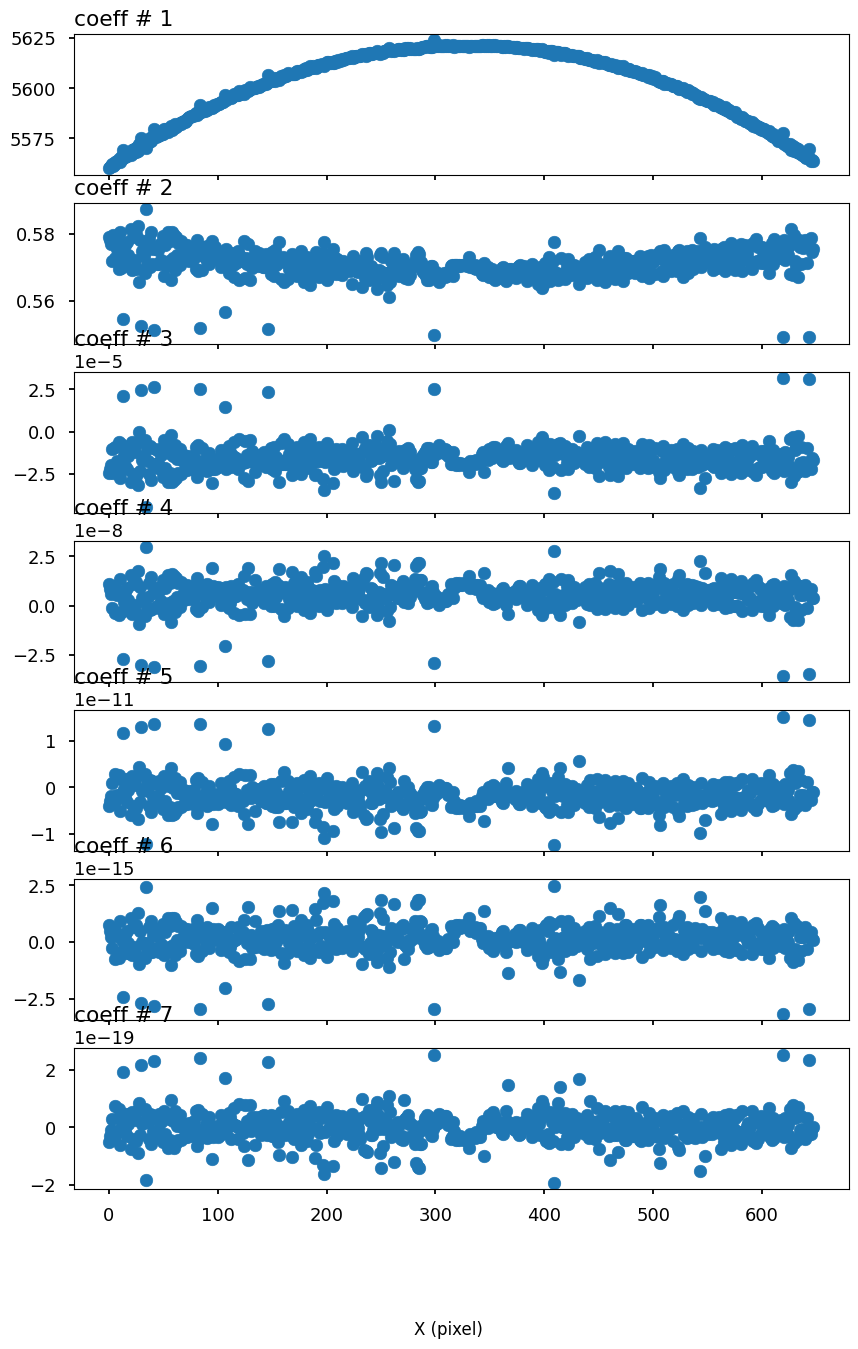

<Figure size 1040x715 with 0 Axes>

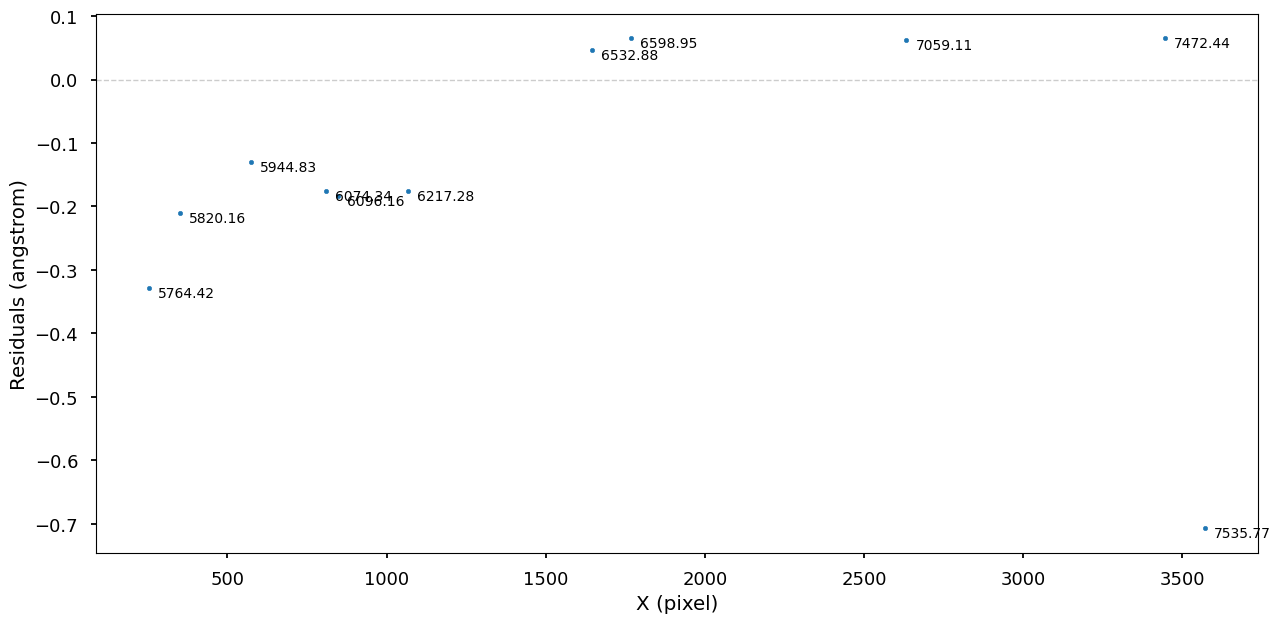

<Figure size 1040x715 with 0 Axes>

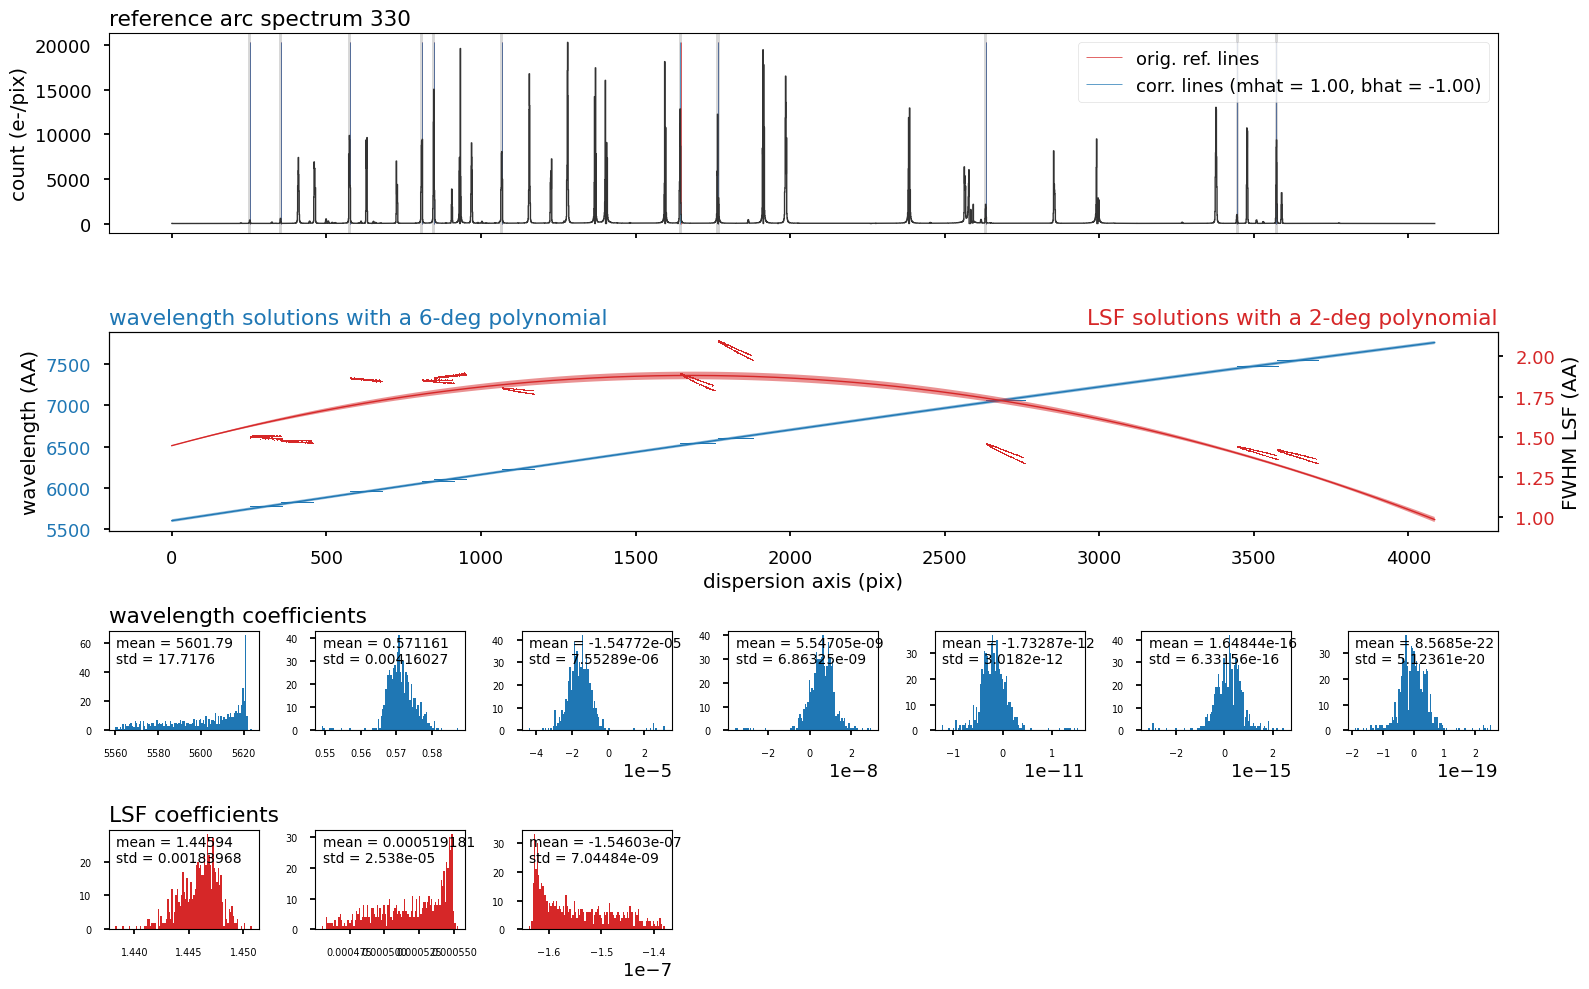

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-r2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-r2.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  82.3529 %
[INFO]: going to use 6 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_neon-r3.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'r3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_r3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 34 percentage masked  82.3529 %
[INFO]: going to use 6 lines
[INFO]:

<Figure size 1040x715 with 0 Axes>

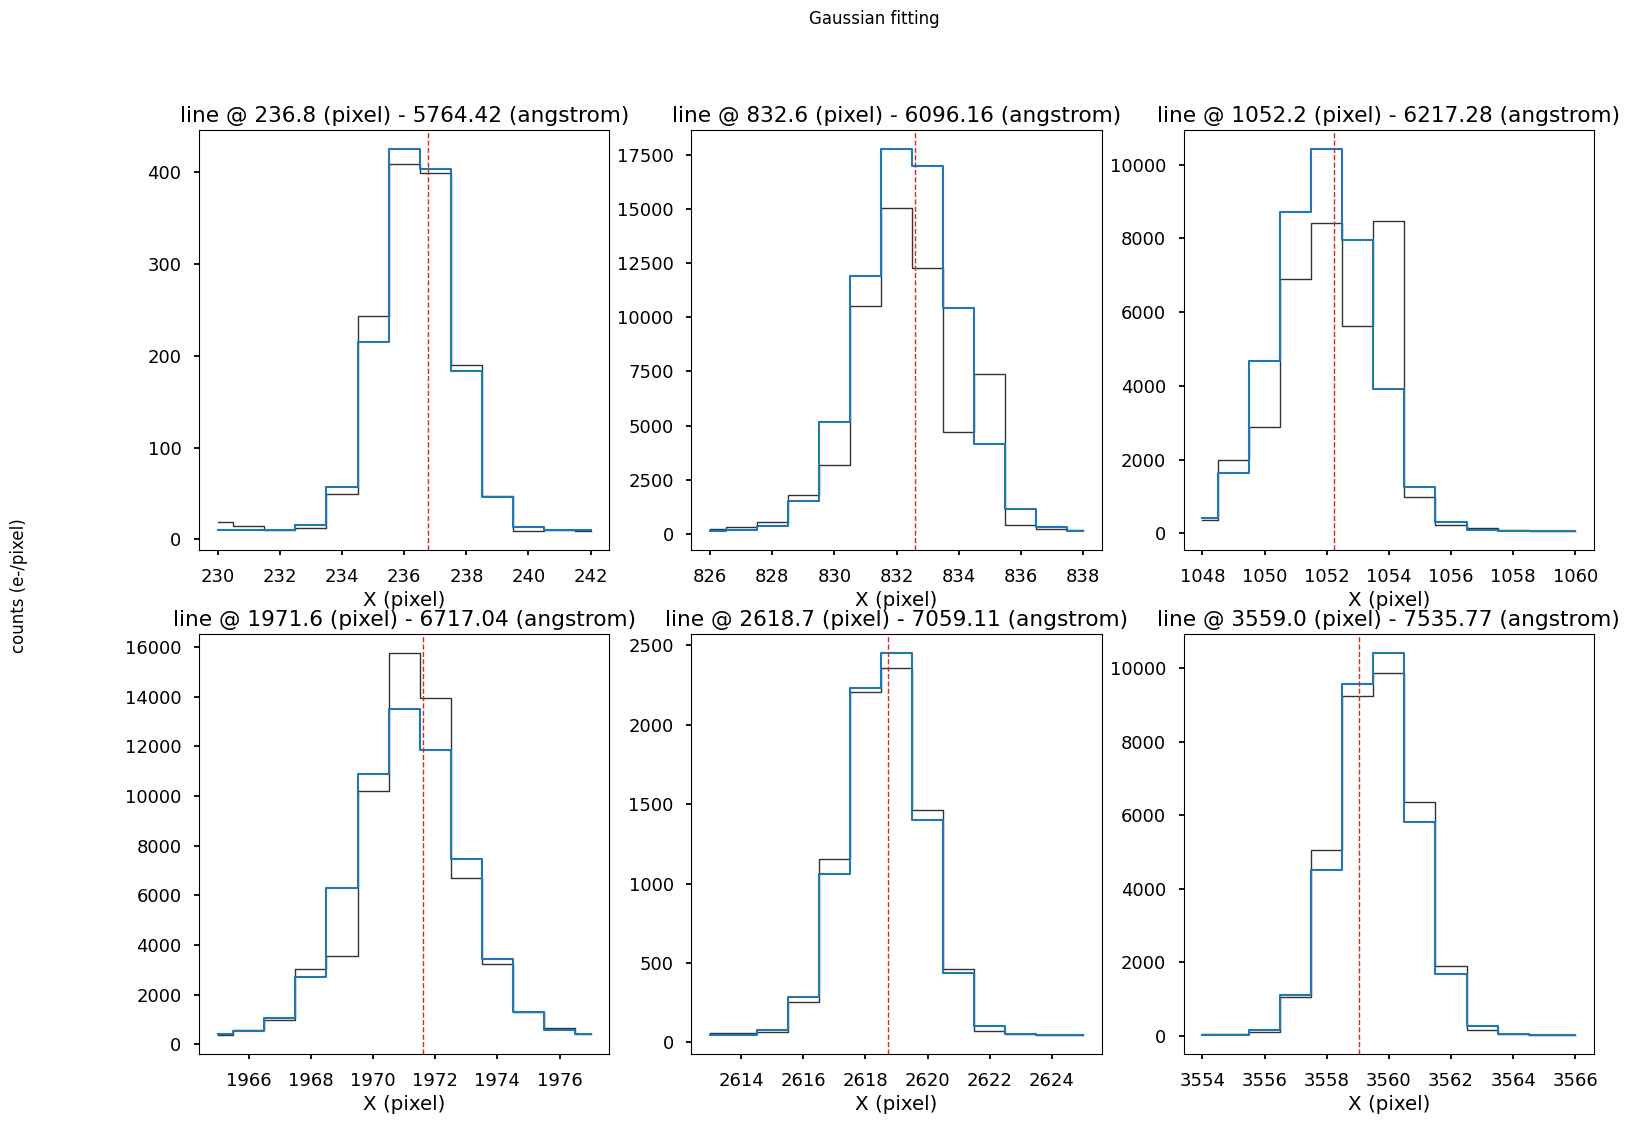

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 4-deg polynomials
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 447 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 556 has all lines masked
[WARNING]: fiber 575 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.0433361 AA (0.0827586 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.173547 AA (0.325198 pix)


<Figure size 1040x715 with 0 Axes>

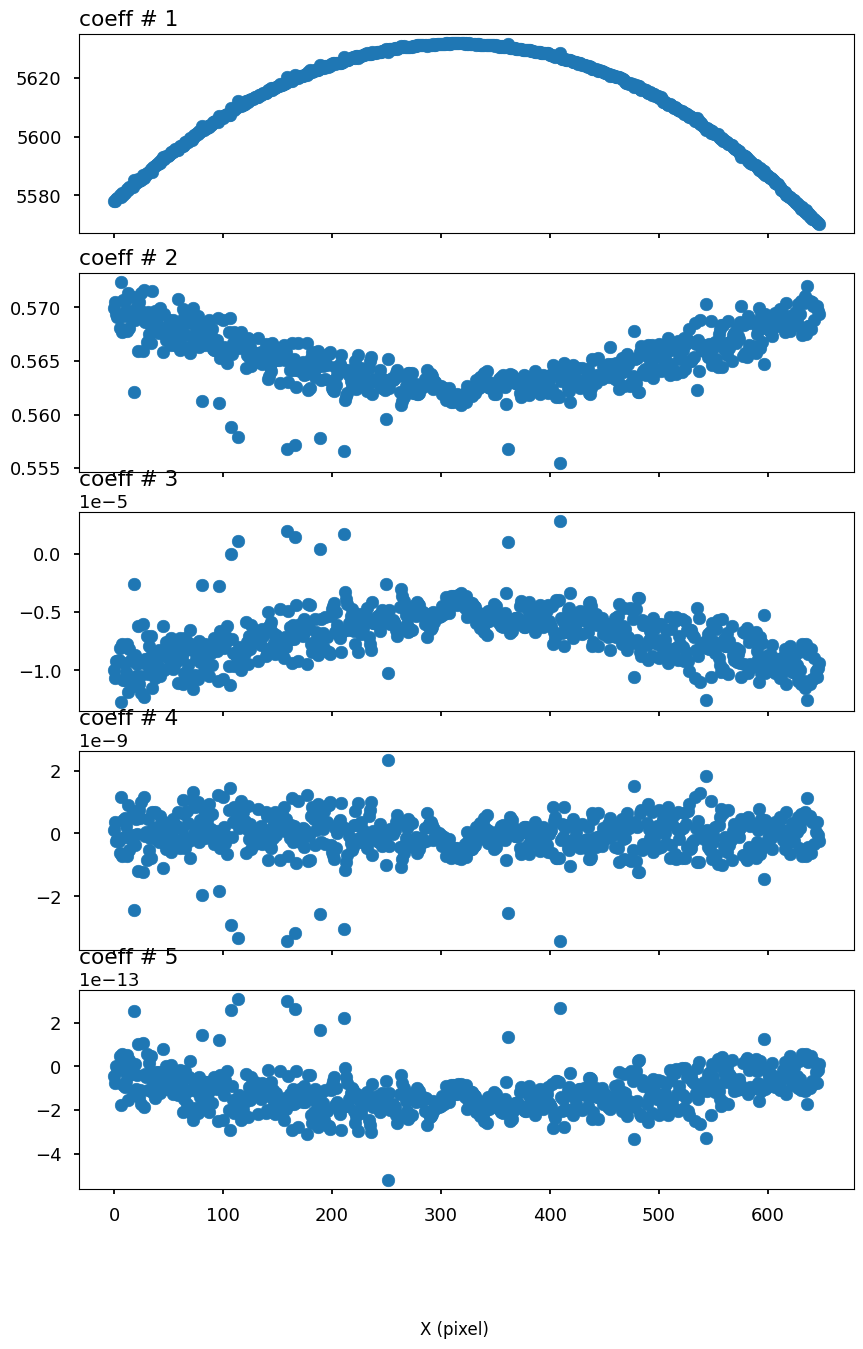

<Figure size 1040x715 with 0 Axes>

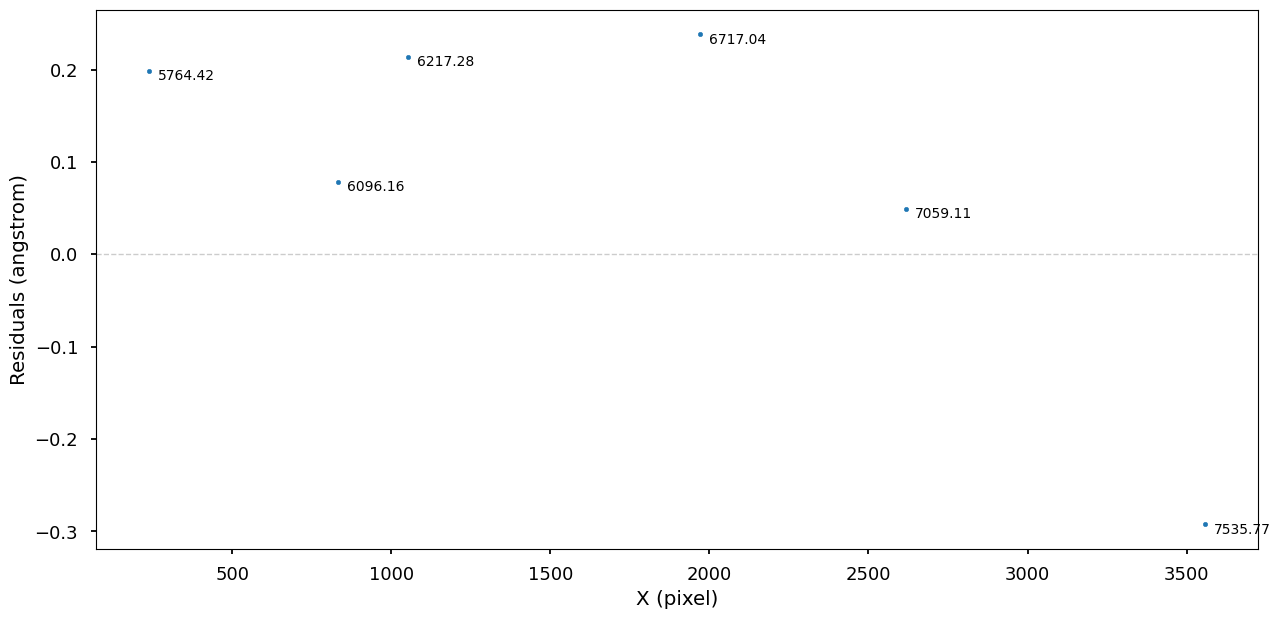

<Figure size 1040x715 with 0 Axes>

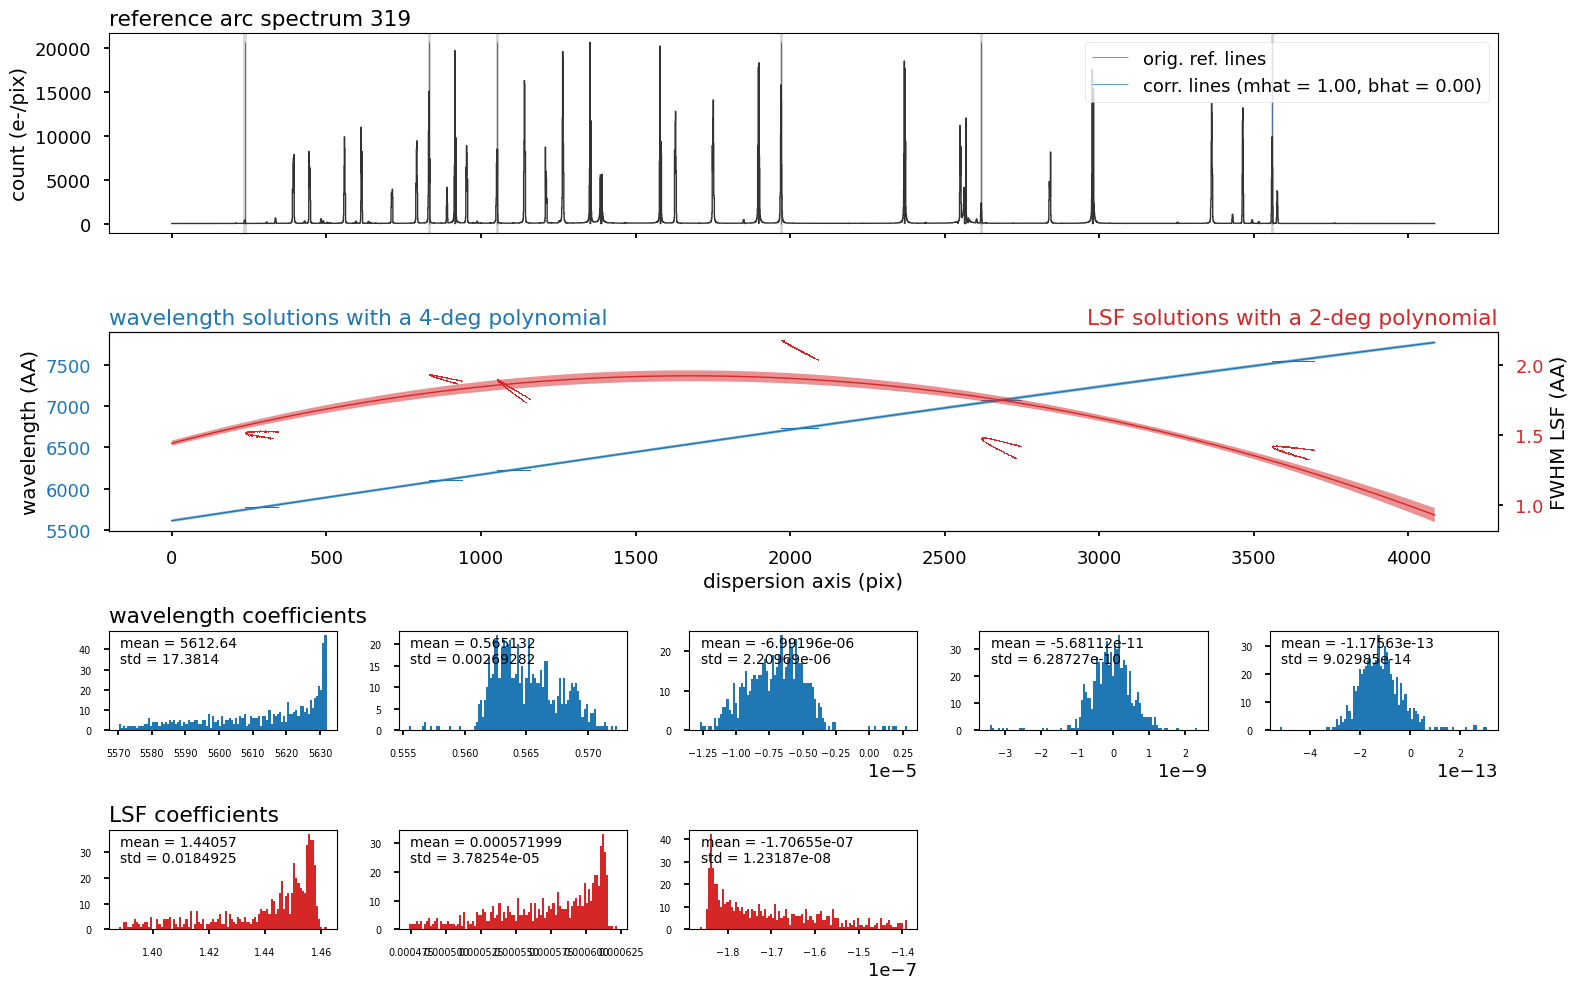

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-r3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-r3.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_neon-z1.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z1'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO

<Figure size 1040x715 with 0 Axes>

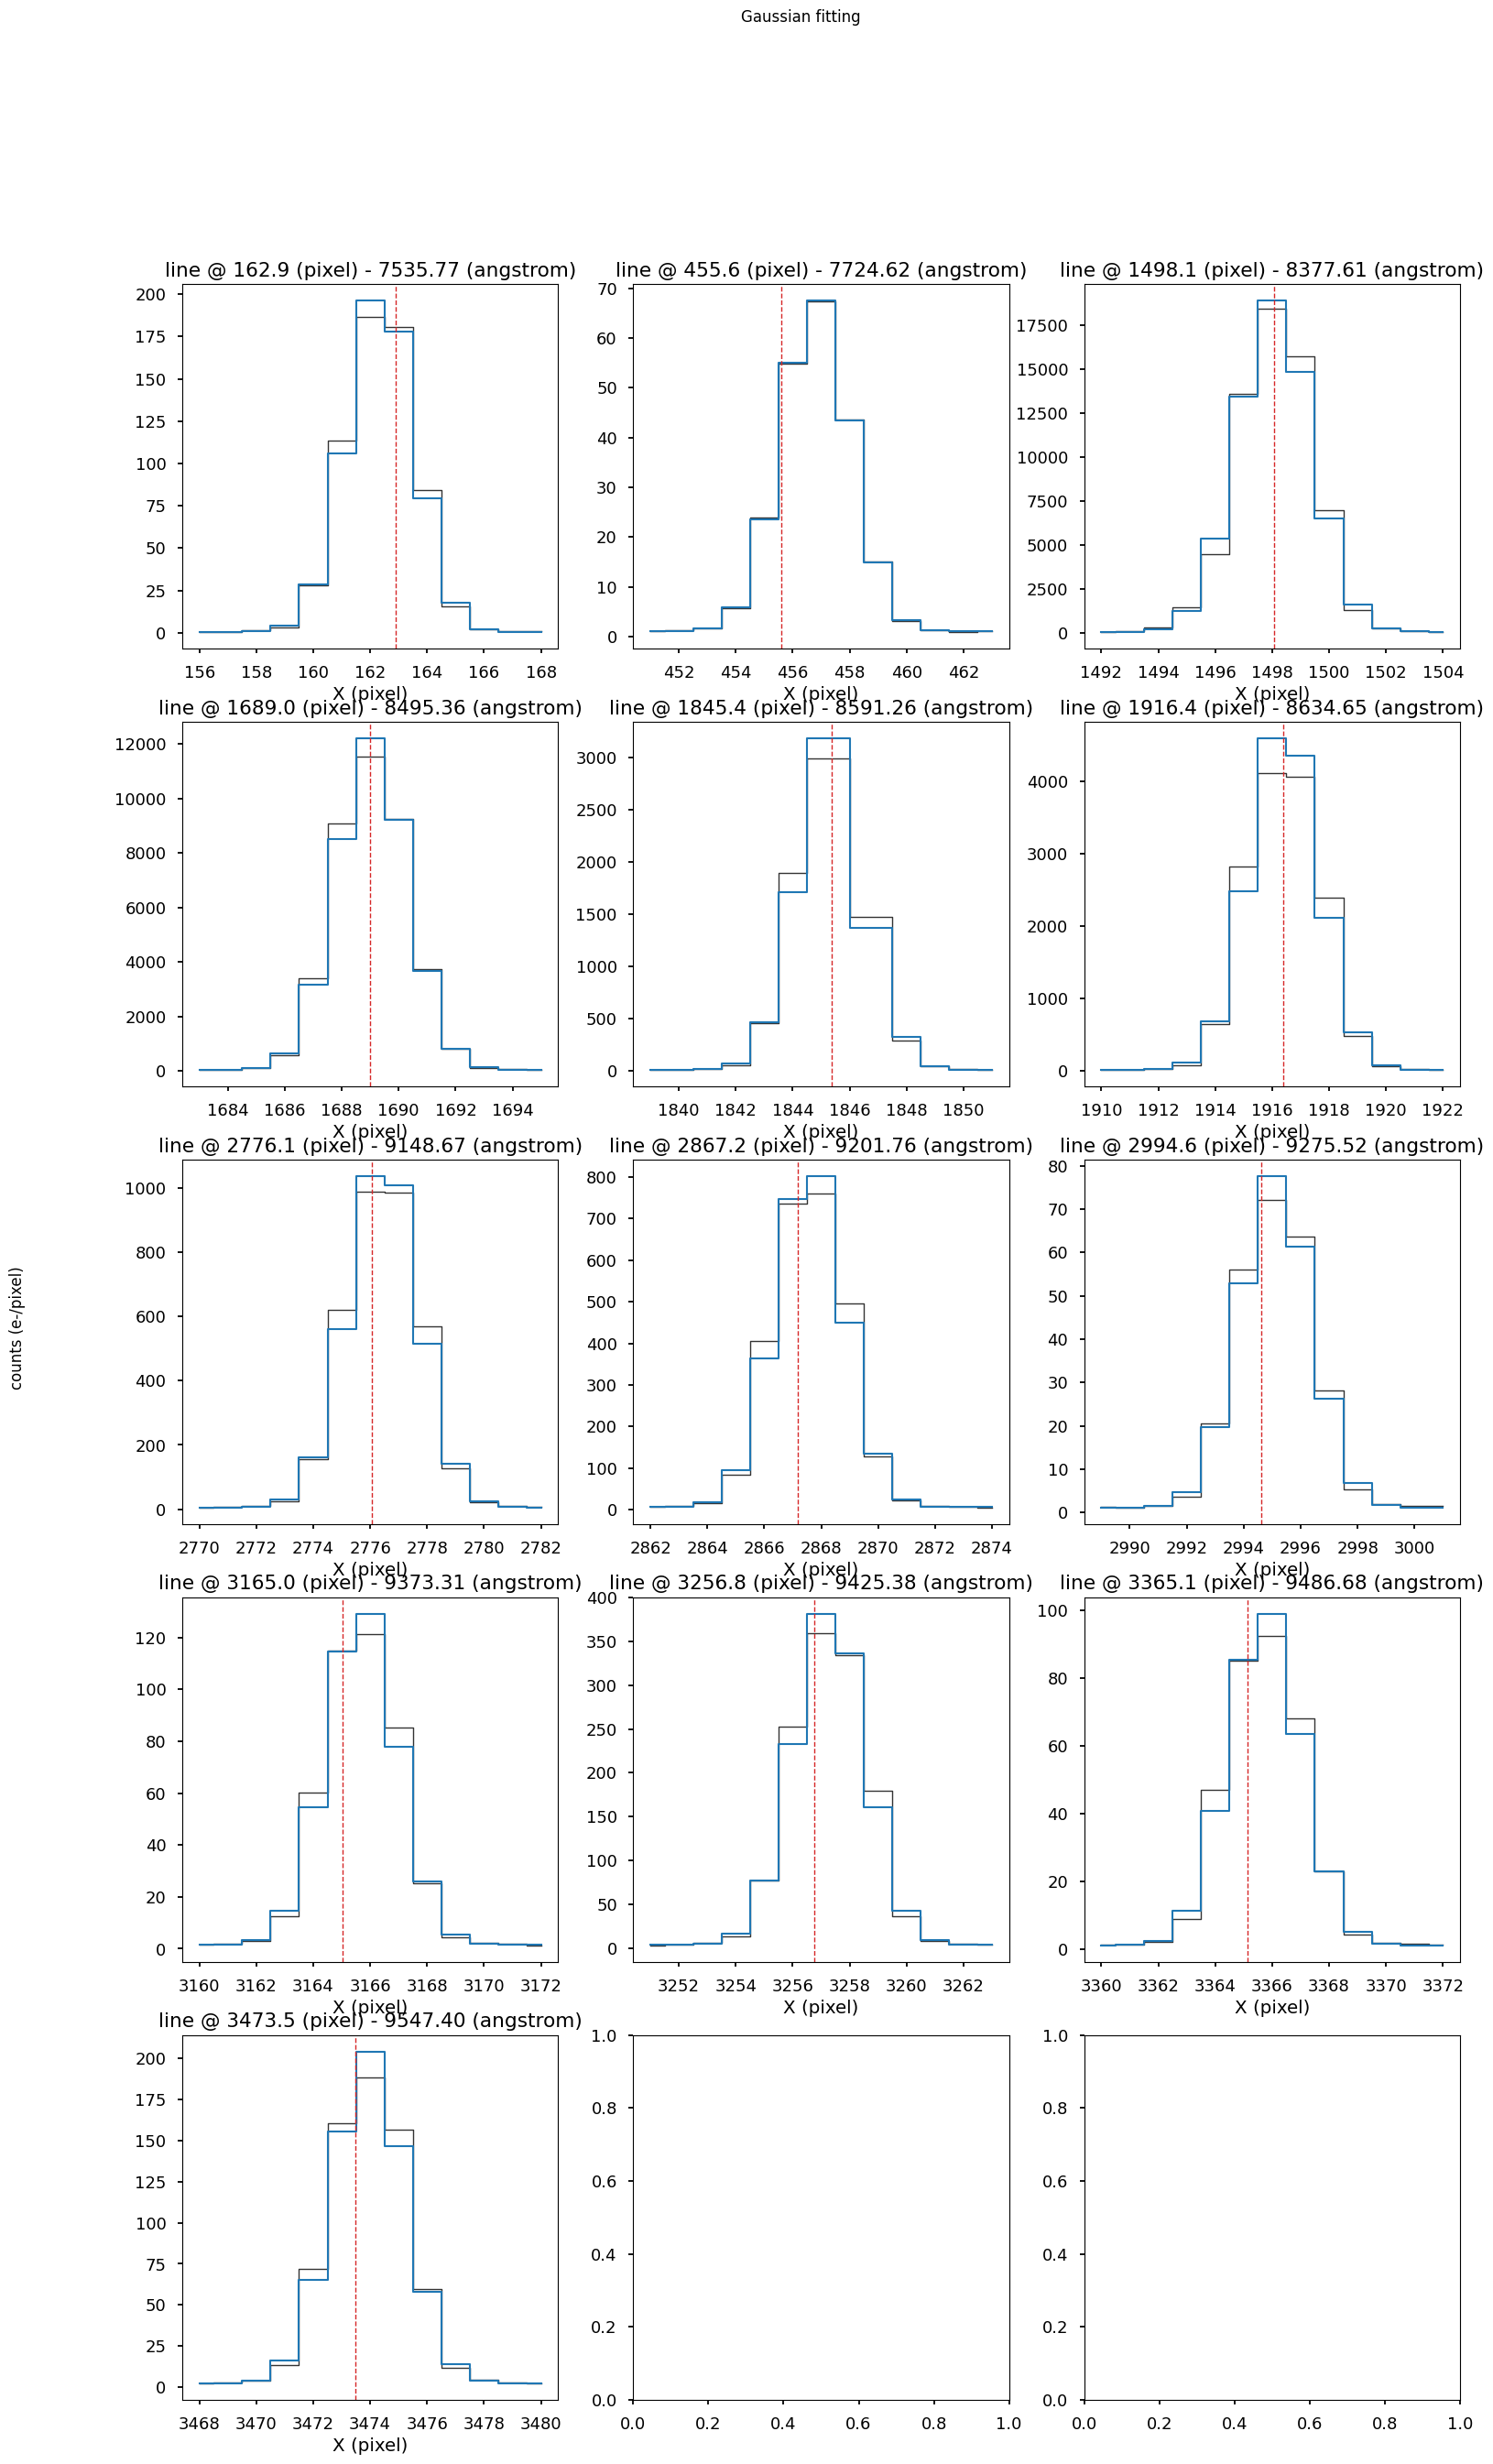

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 7-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 414 has all lines masked
[WARNING]: fiber 462 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.00720909 AA (0.012023 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.042214 AA (0.0705289 pix)


<Figure size 1040x715 with 0 Axes>

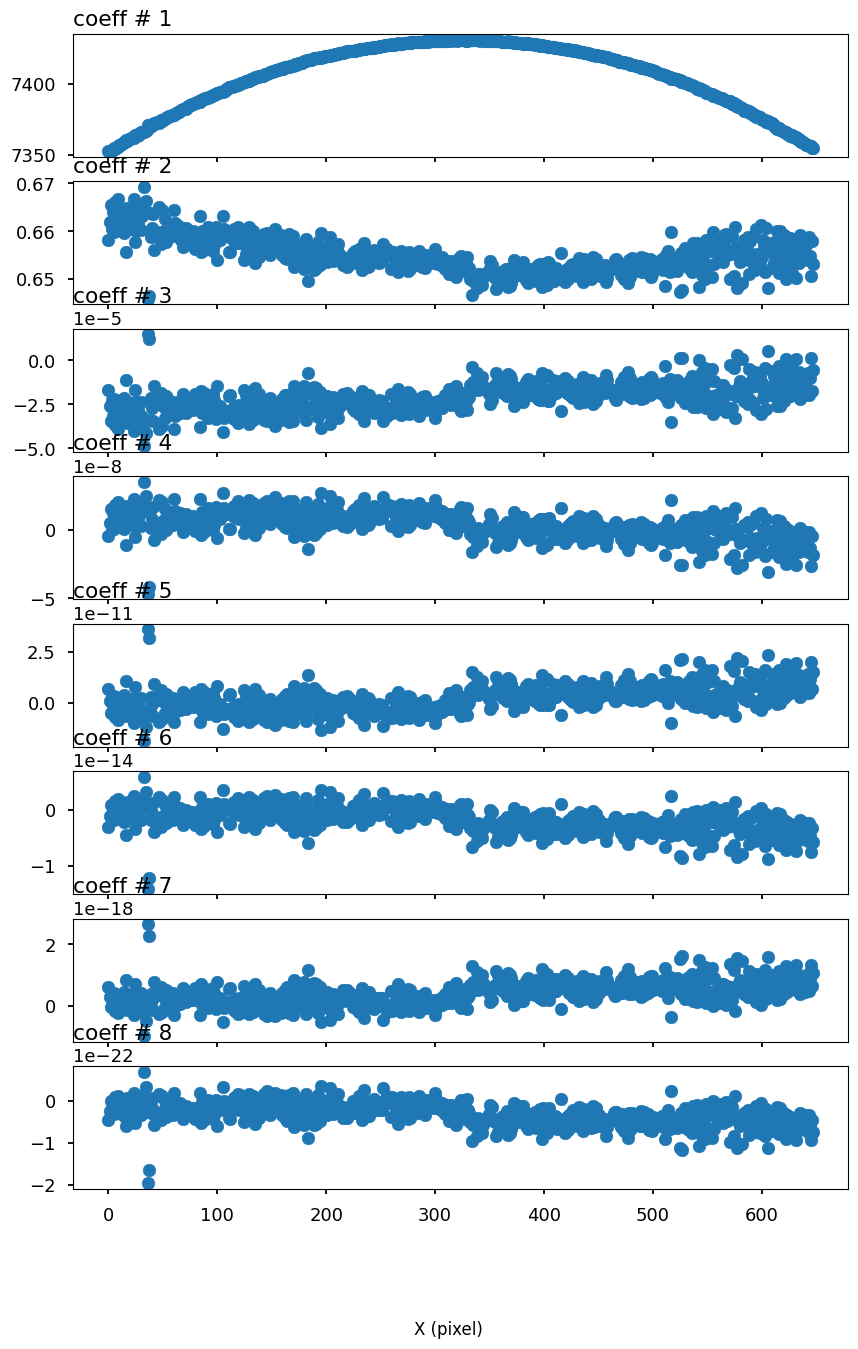

<Figure size 1040x715 with 0 Axes>

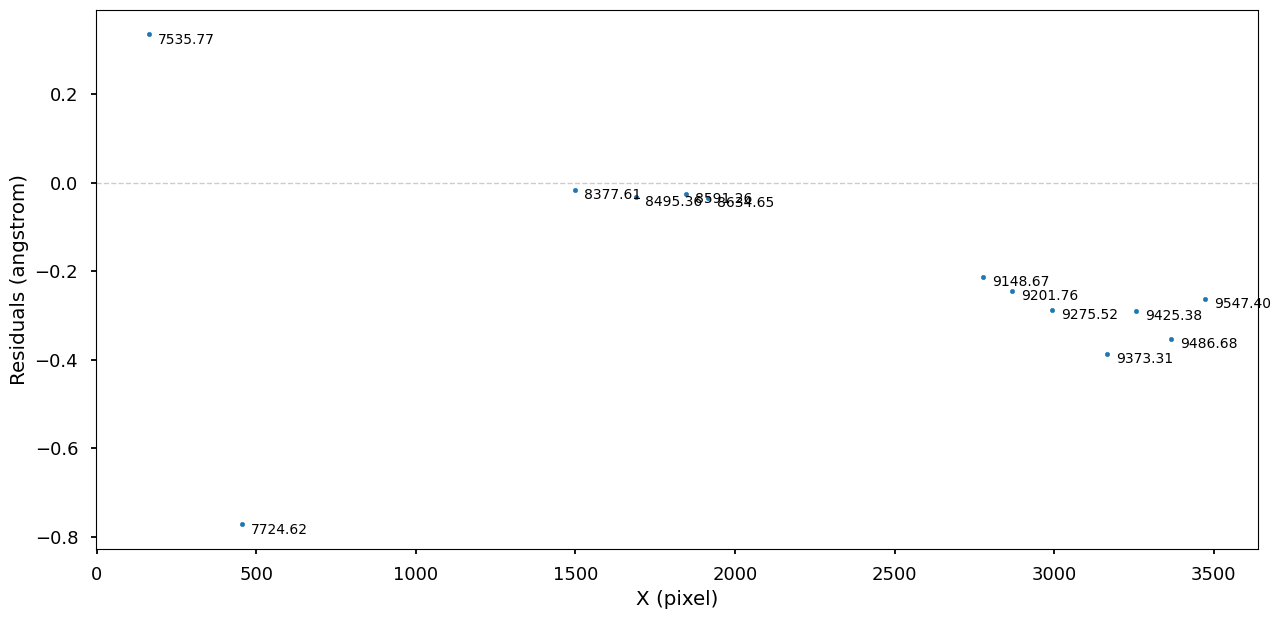

<Figure size 1040x715 with 0 Axes>

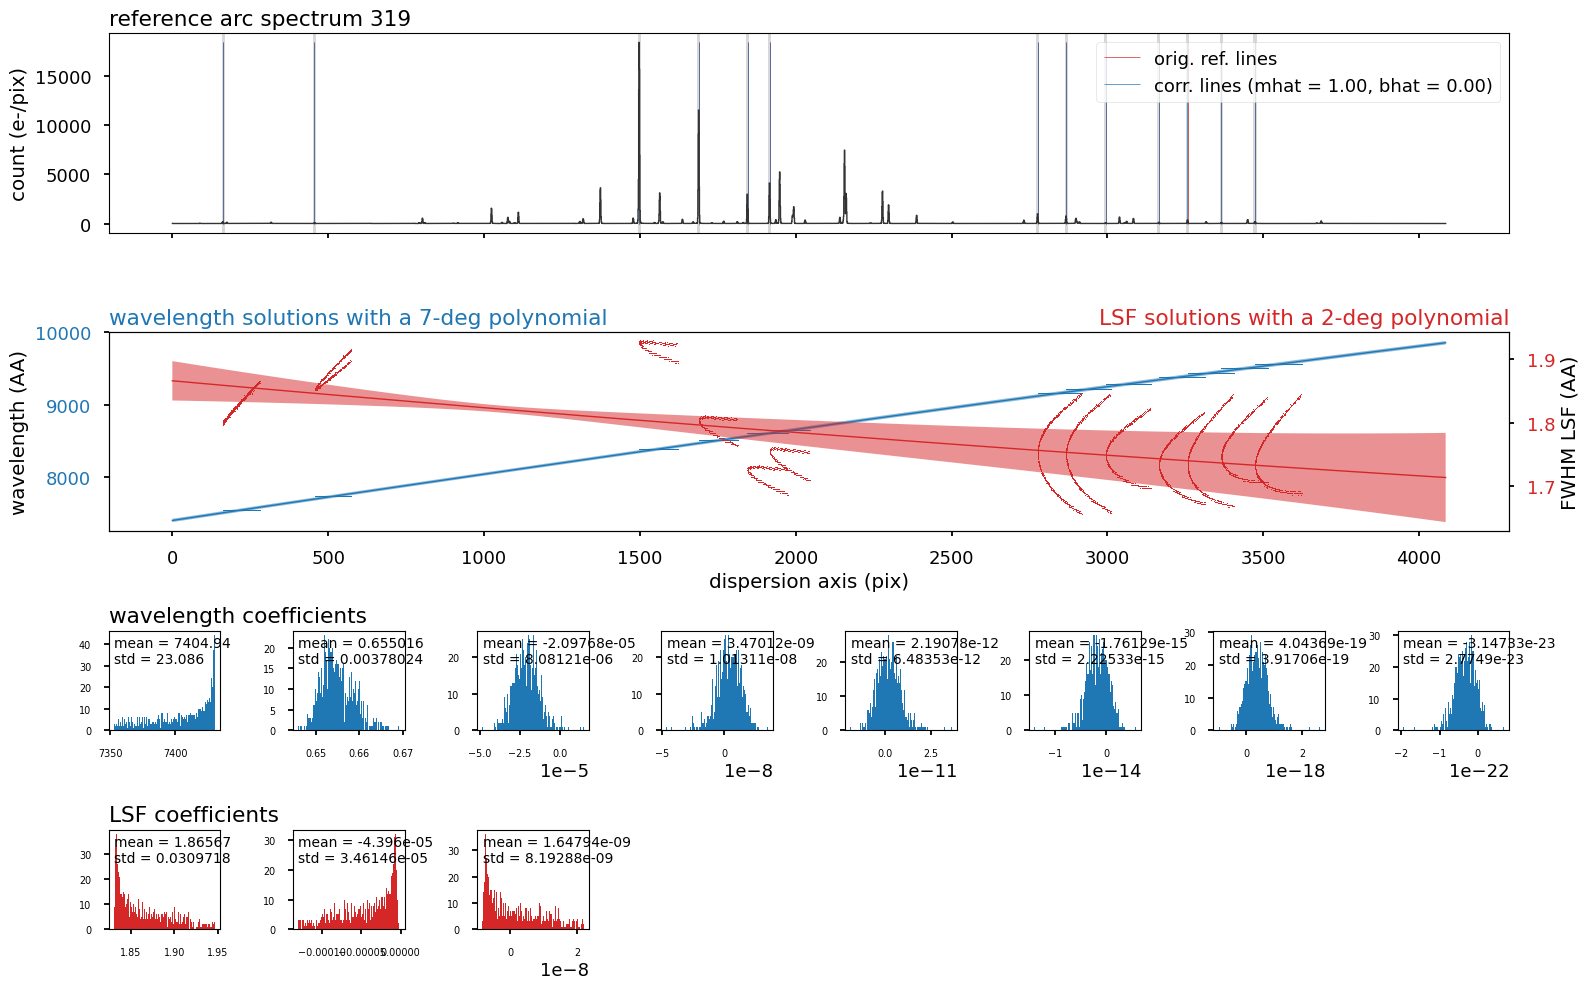

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-z1.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-z1.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_neon-z2.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z2'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z2.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO

<Figure size 1040x715 with 0 Axes>

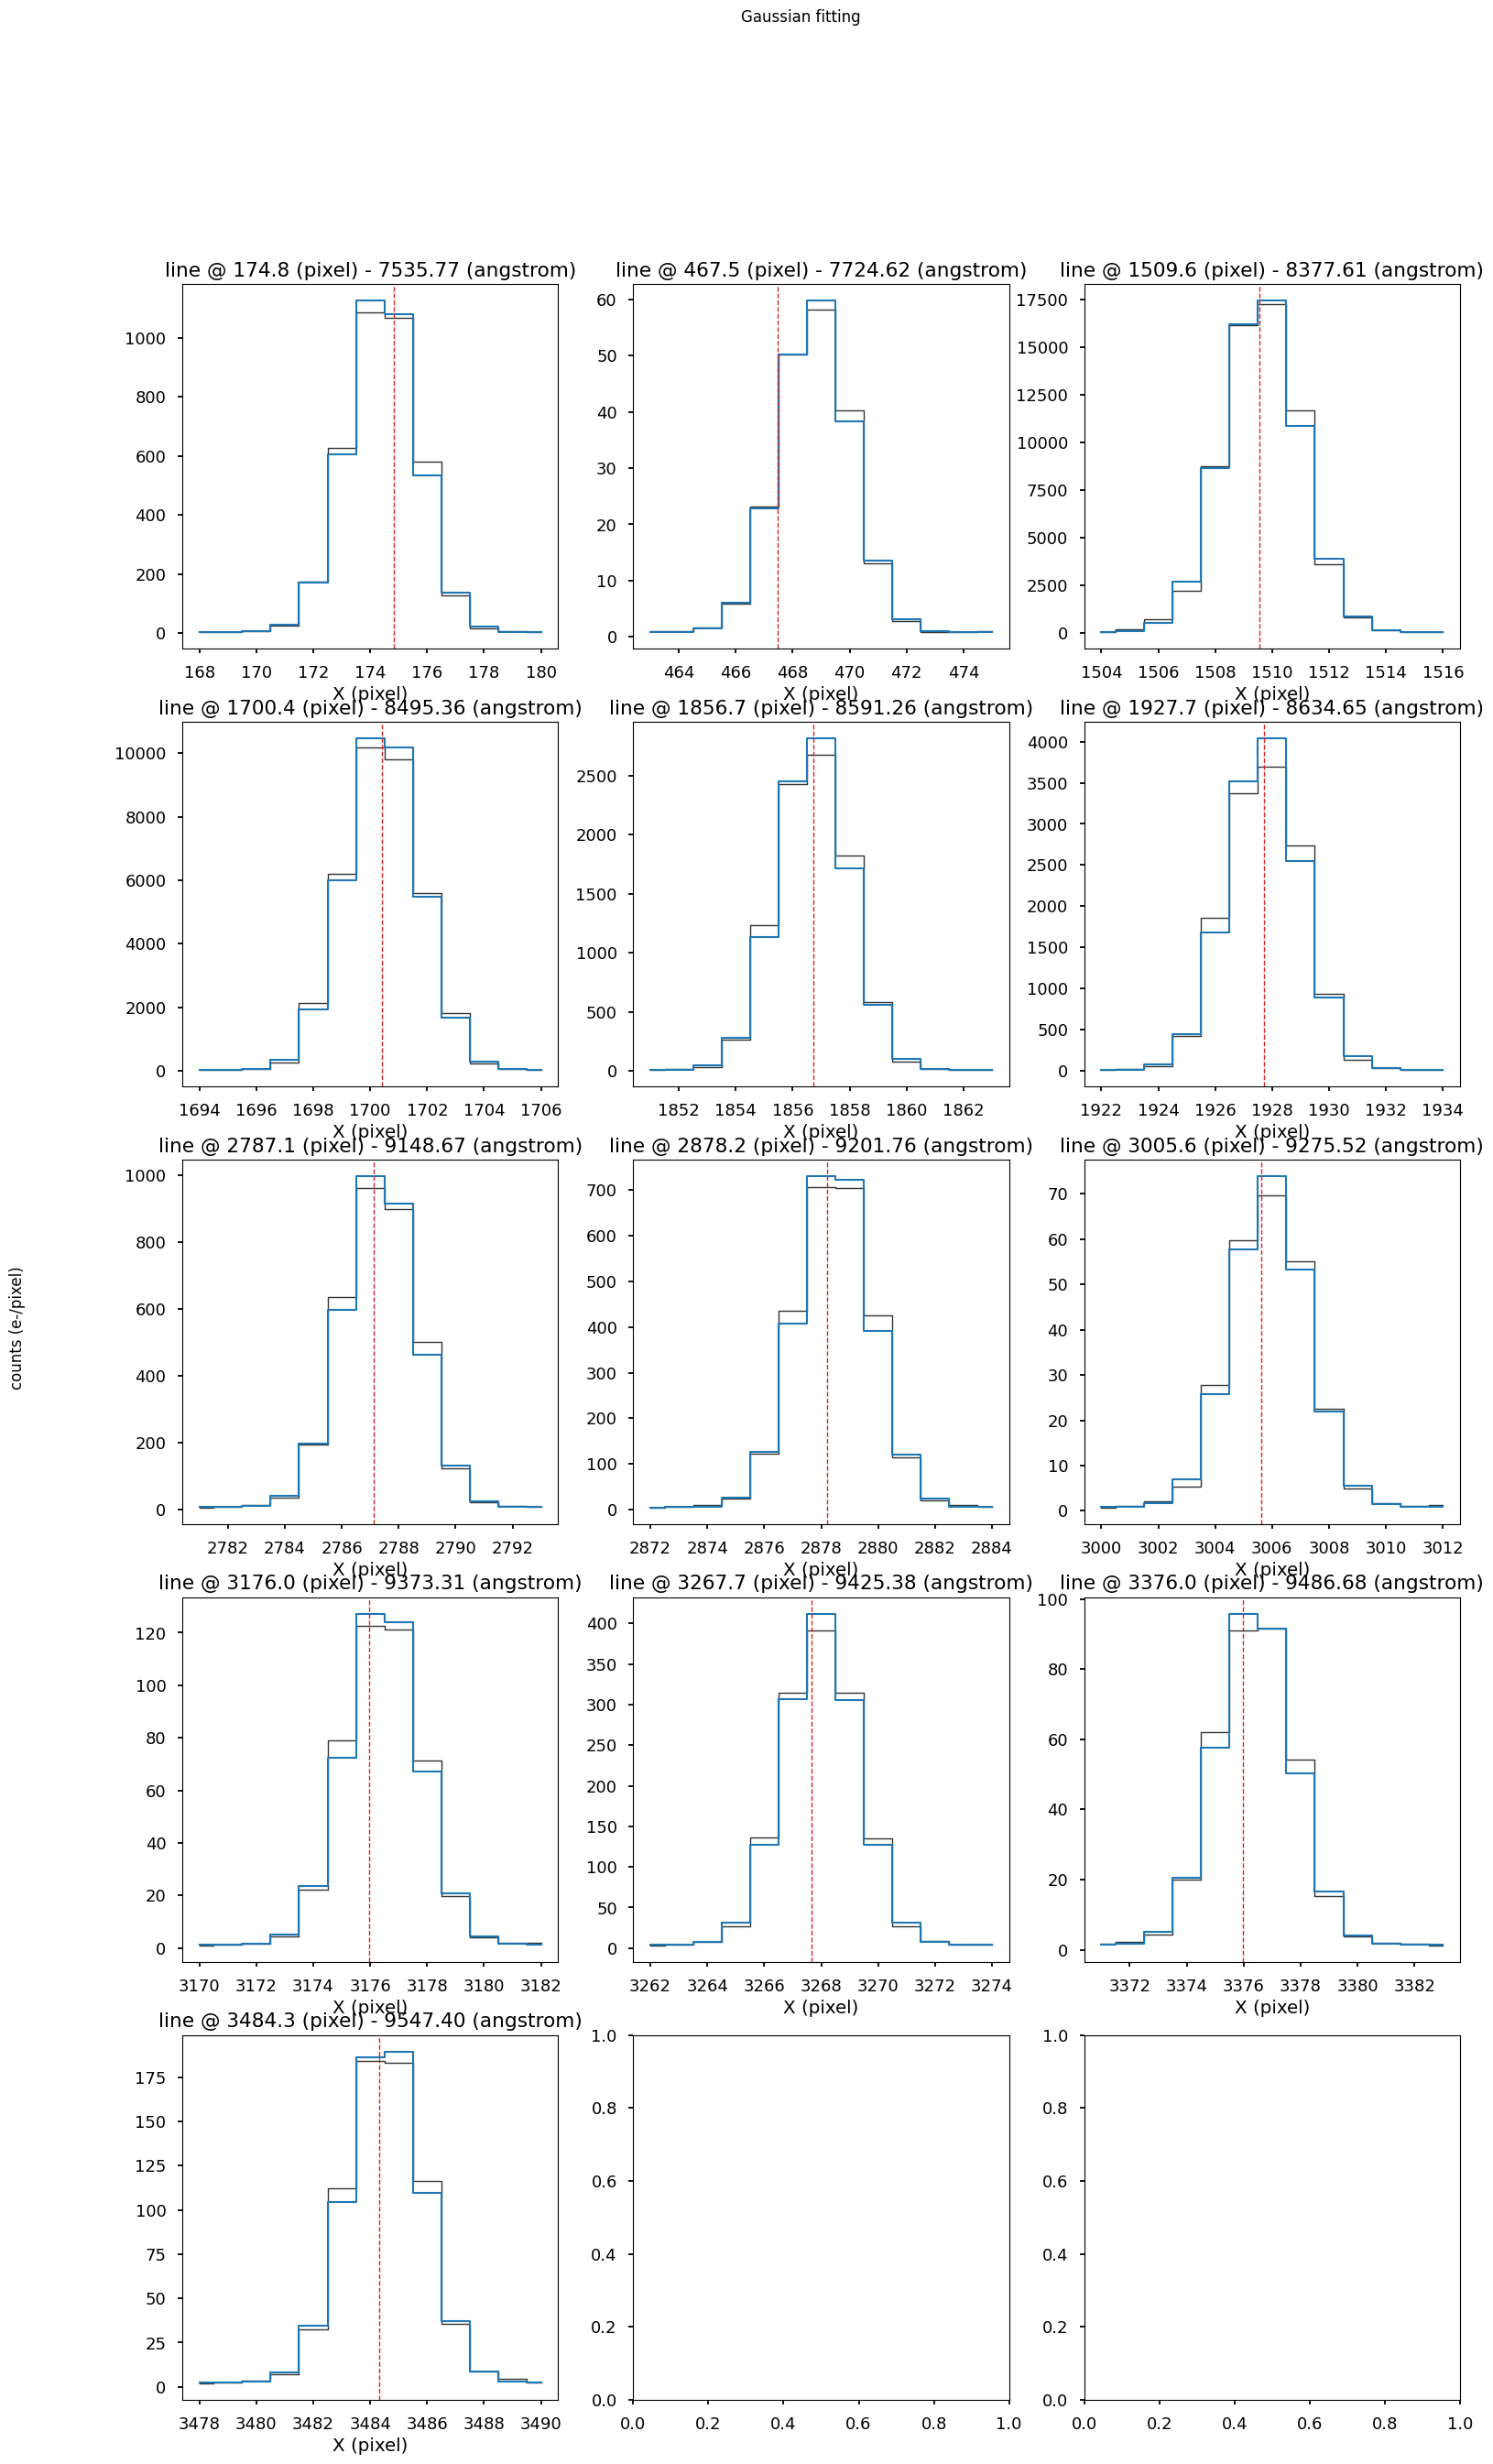

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 7-deg polynomials
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 557 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.00618895 AA (0.0102796 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0338378 AA (0.0559129 pix)


<Figure size 1040x715 with 0 Axes>

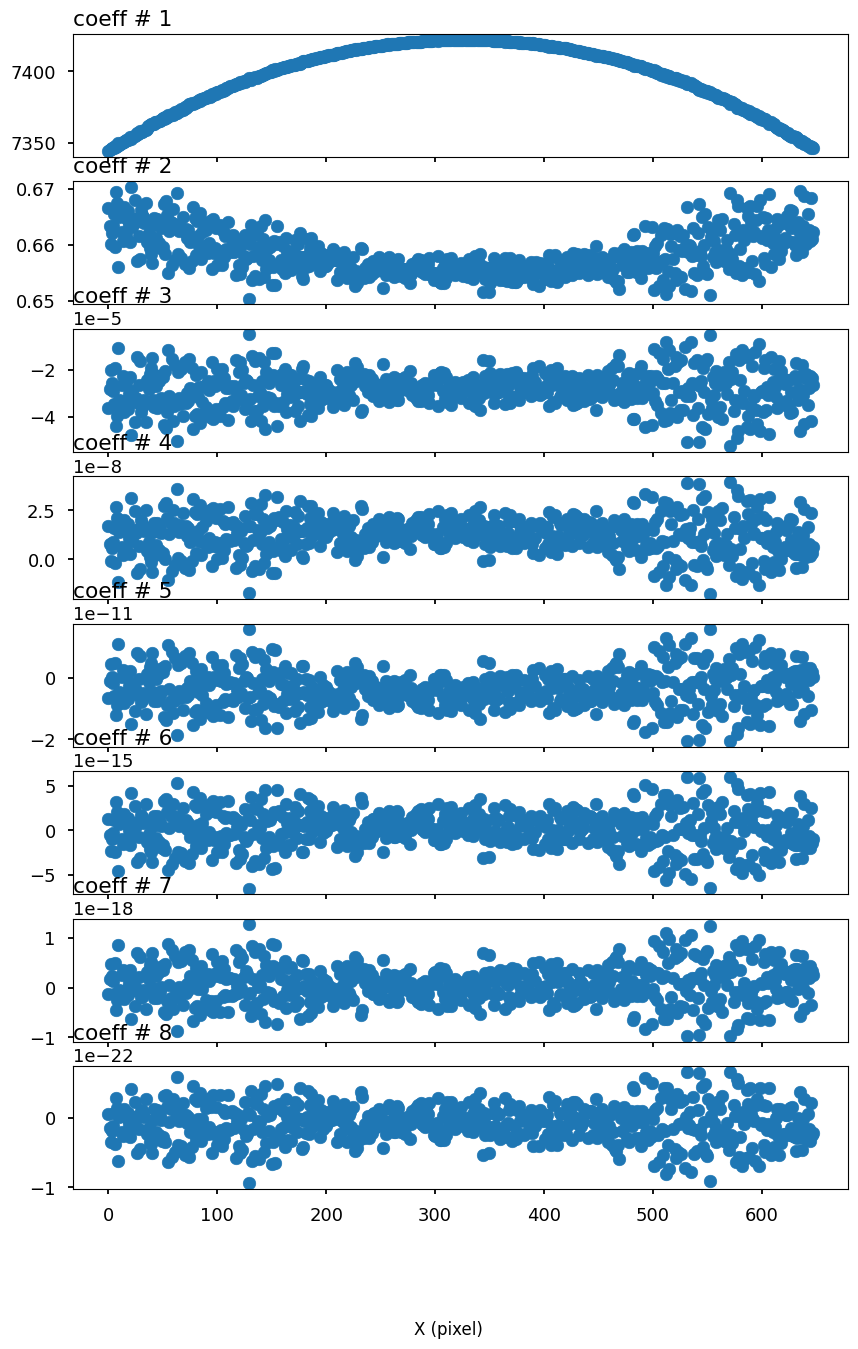

<Figure size 1040x715 with 0 Axes>

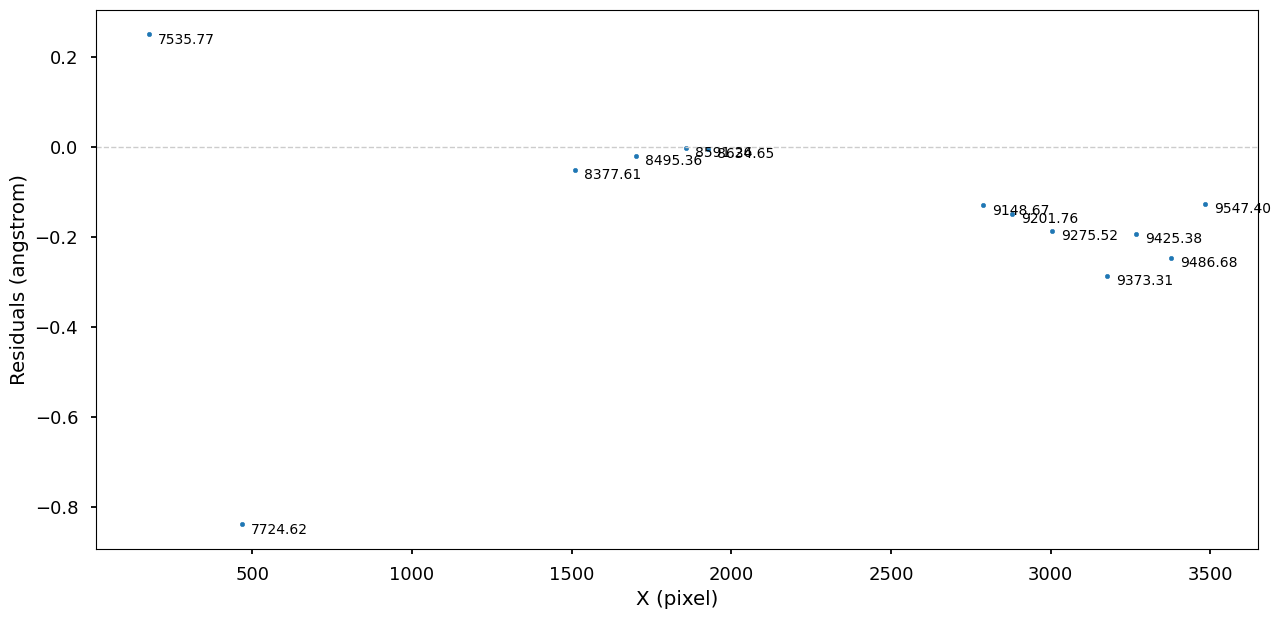

<Figure size 1040x715 with 0 Axes>

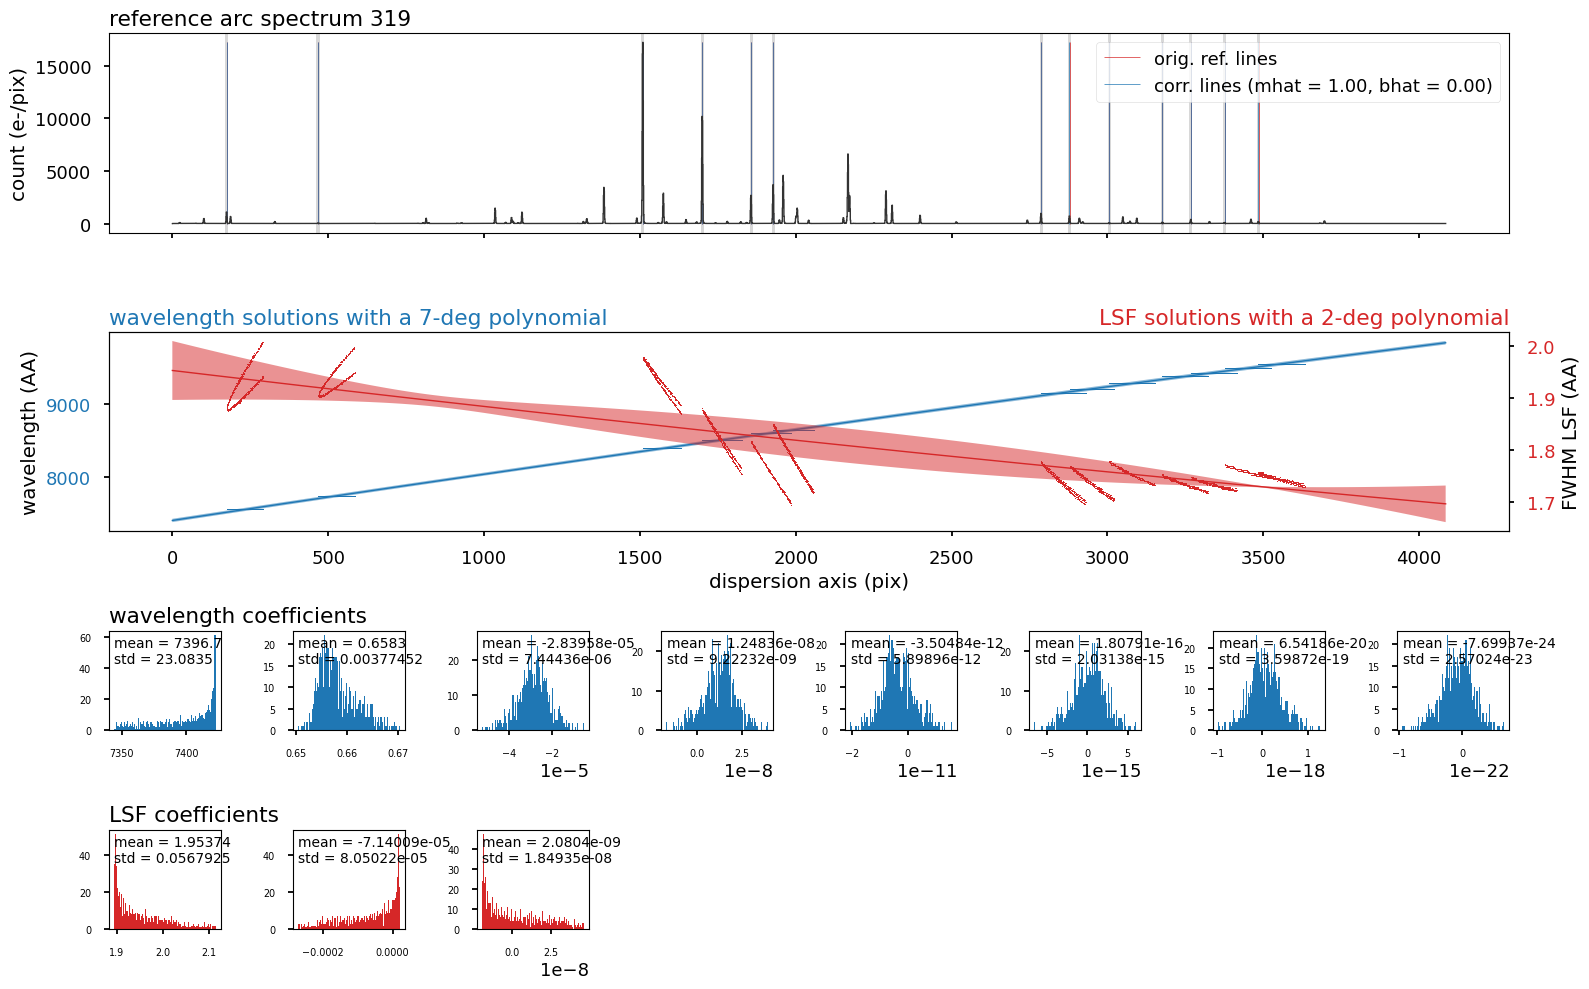

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-z2.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-z2.fits'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO]: reading arc from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-xmarc_neon-z3.fits'
[INFO]: loading reference lines for lamp = 'neon' in camera = 'z3'
[INFO]: pixel-to-wavelength map in file '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/python/lvmdrp/etc/wavelength/lvm-pixwav-neon_z3.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of lines in file 31 percentage masked  58.0645 %
[INFO]: going to use 13 lines
[INFO

<Figure size 1040x715 with 0 Axes>

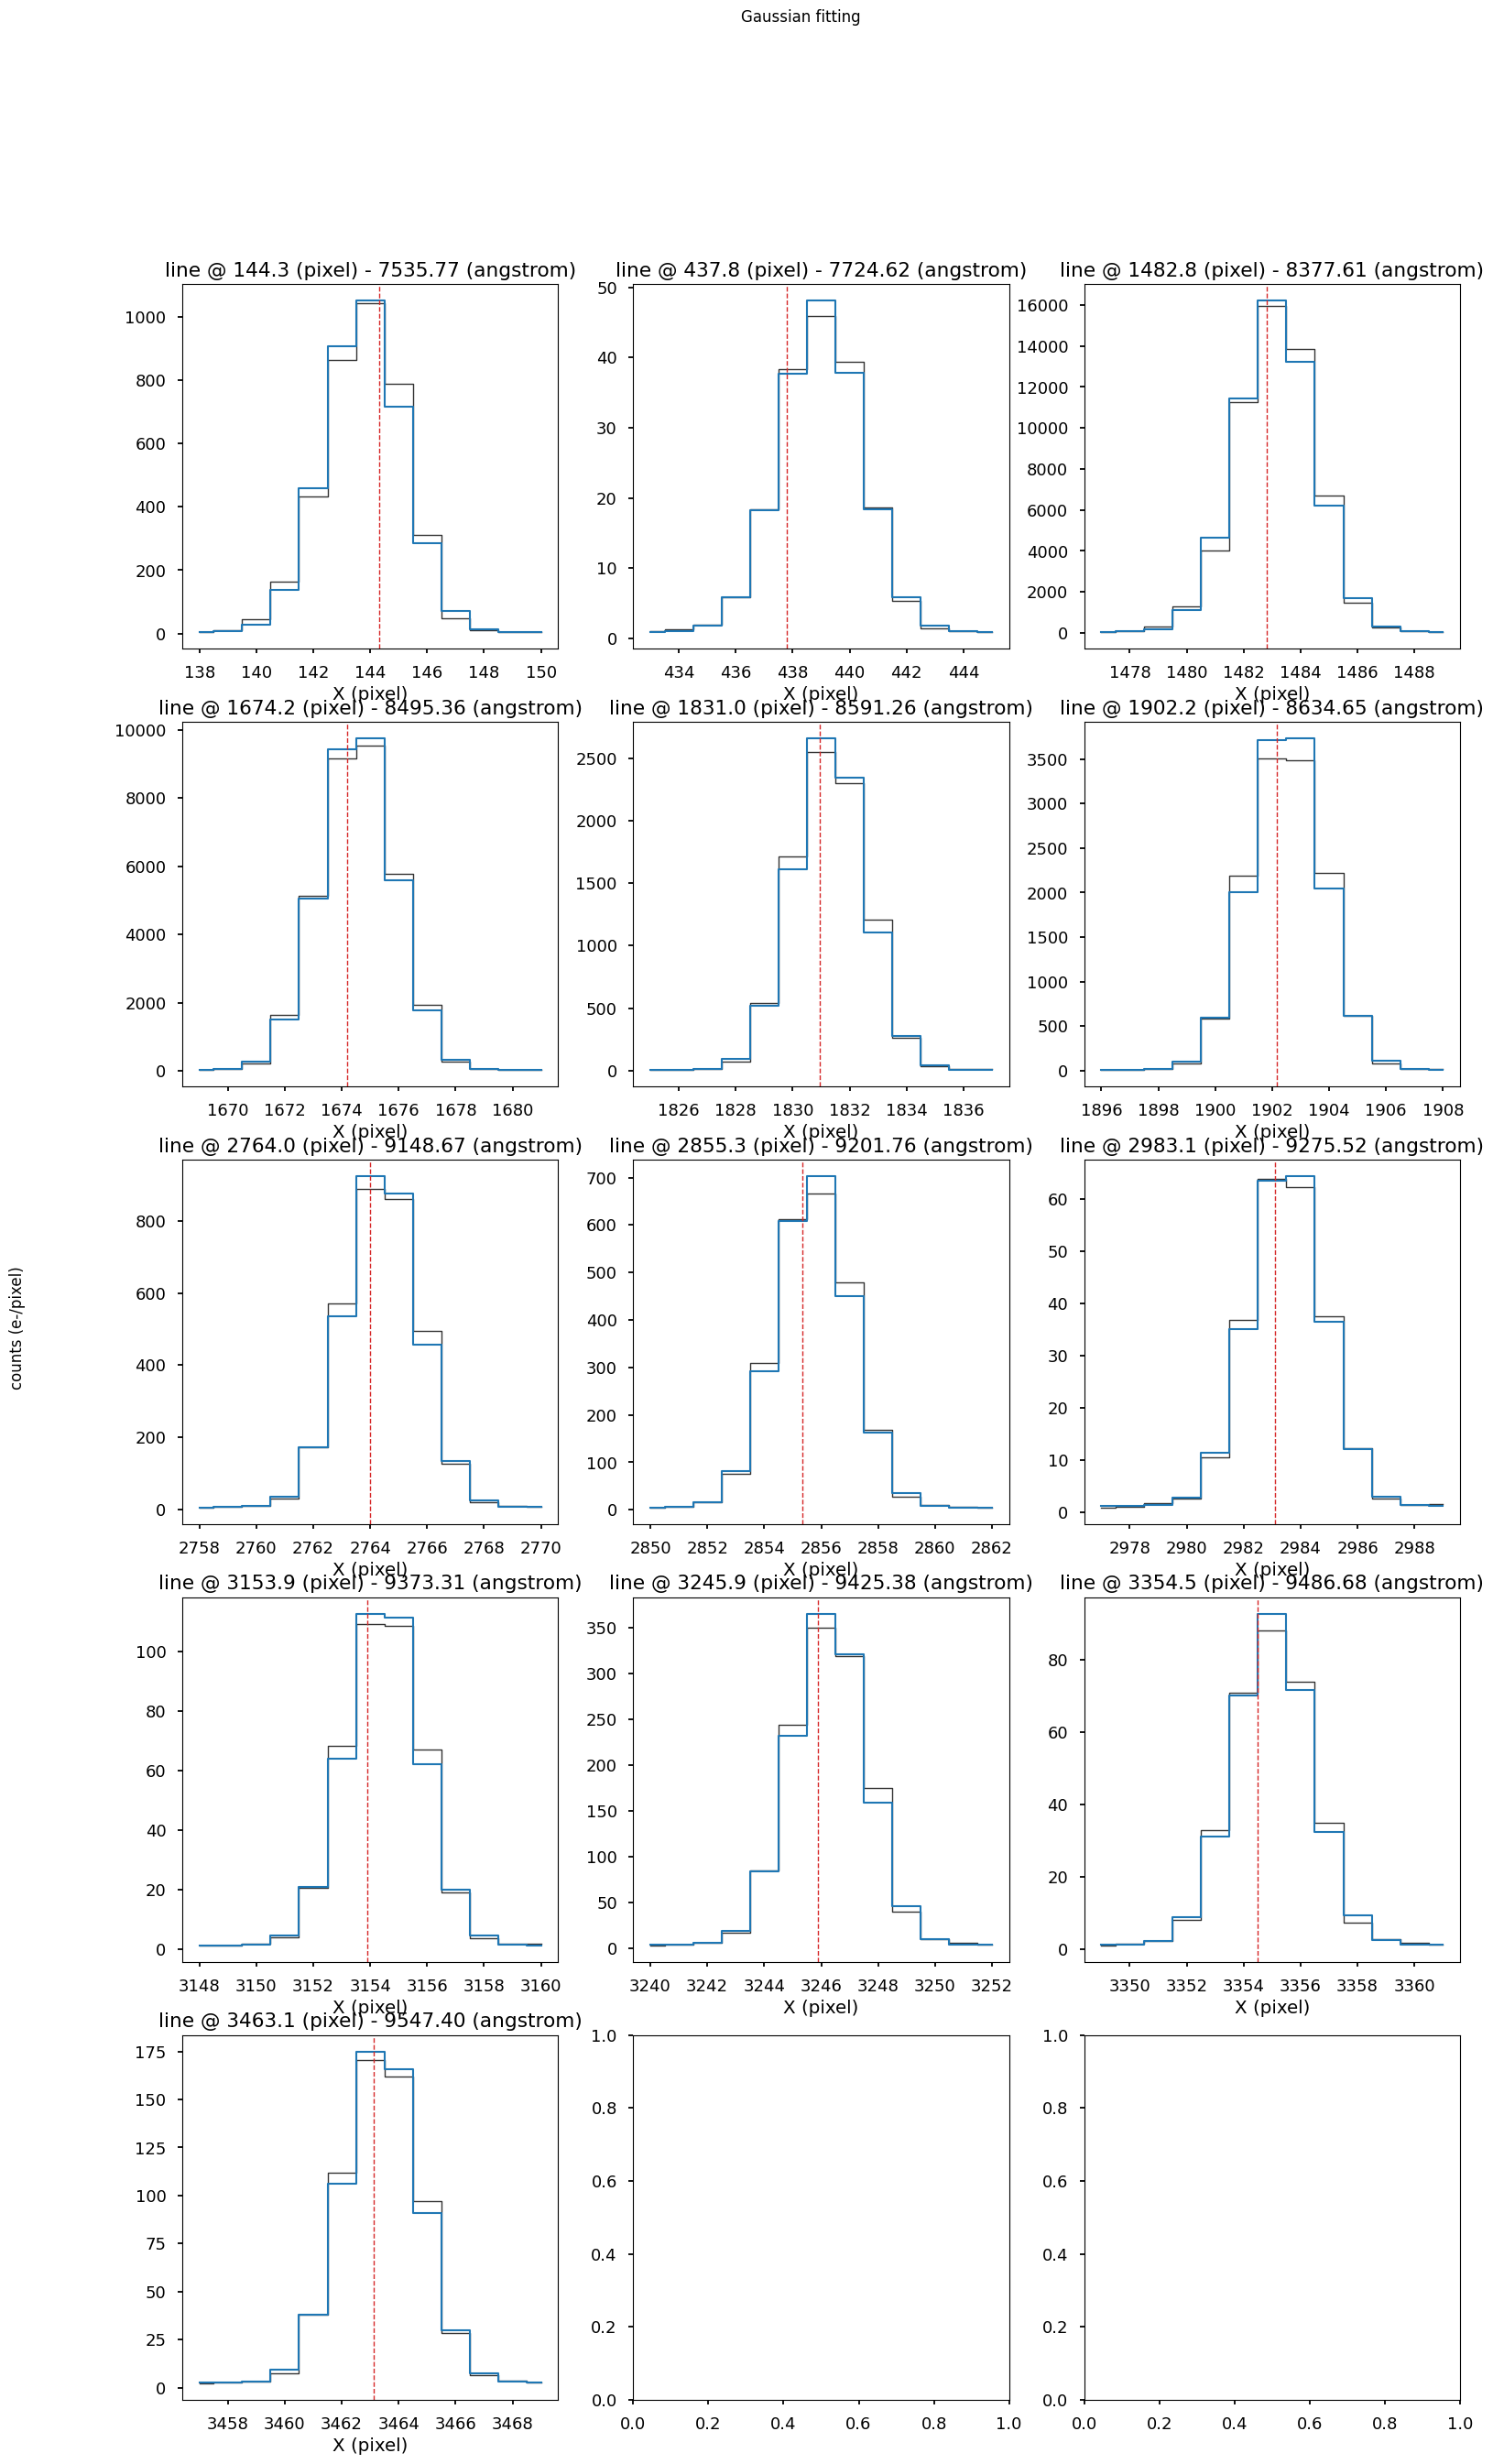

[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 2-deg polynomials
[INFO]: fitting wavelength solutions using 7-deg polynomials
[WARNING]: fiber 109 has all lines masked
[WARNING]: fiber 217 has all lines masked
[WARNING]: fiber 281 has all lines masked
[WARNING]: fiber 289 has all lines masked
[WARNING]: fiber 325 has all lines masked
[WARNING]: fiber 397 has all lines masked
[WARNING]: fiber 447 has all lines masked
[WARNING]: fiber 505 has all lines masked
[WARNING]: fiber 556 has all lines masked
[WARNING]: fiber 575 has all lines masked
[WARNING]: fiber 580 has all lines masked
[WARNING]: fiber 613 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 0.00635098 AA (0.0106222 pix)
[INFO]: fitting LSF solutions using 2-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0317136 AA (0.0536662 pix)


<Figure size 1040x715 with 0 Axes>

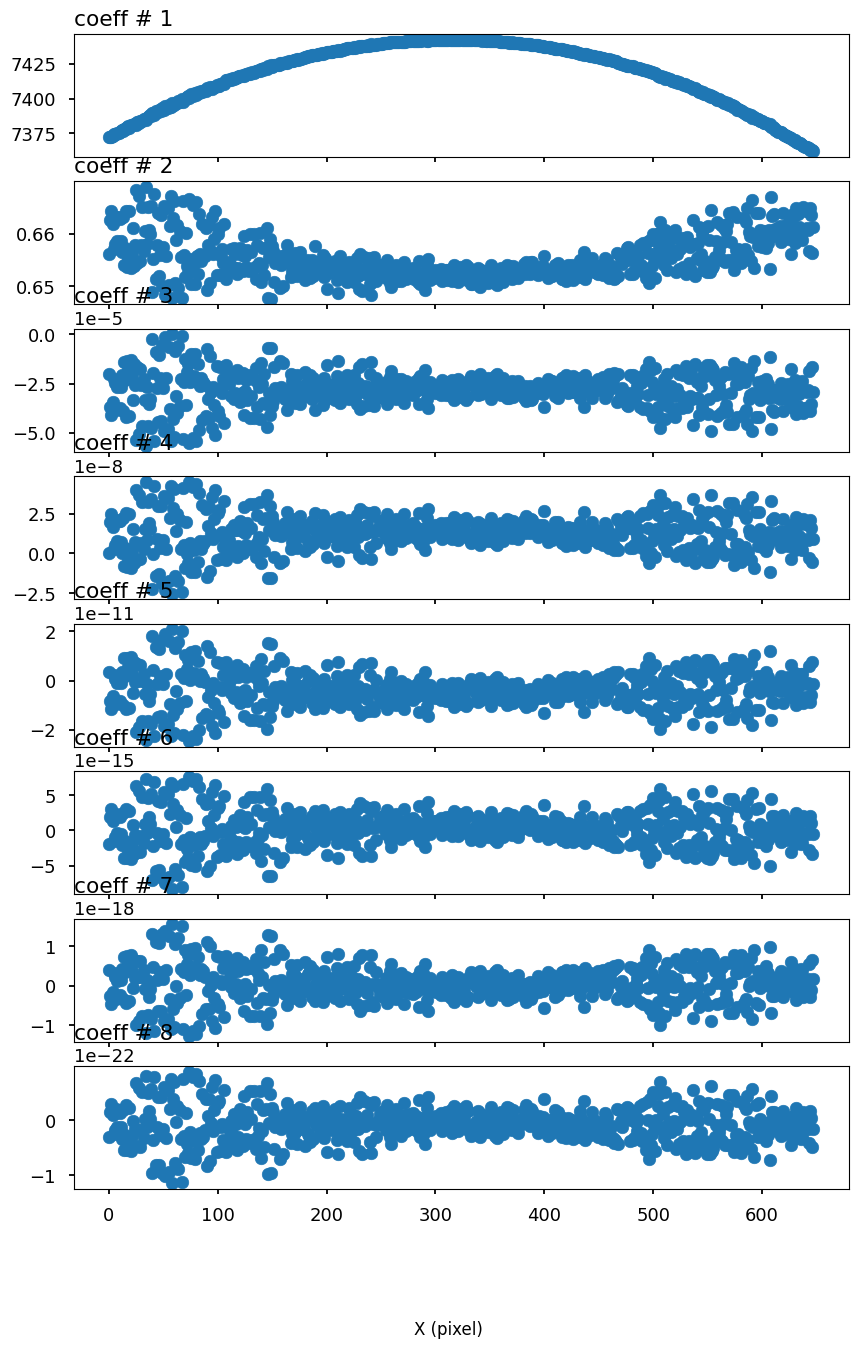

<Figure size 1040x715 with 0 Axes>

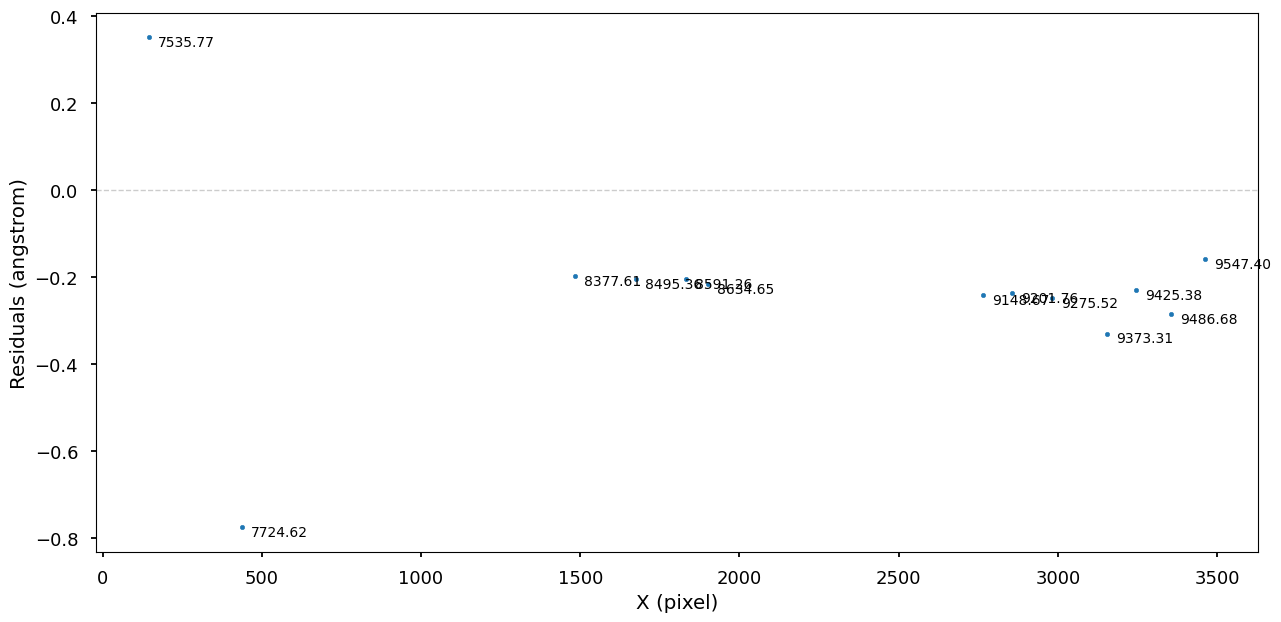

<Figure size 1040x715 with 0 Axes>

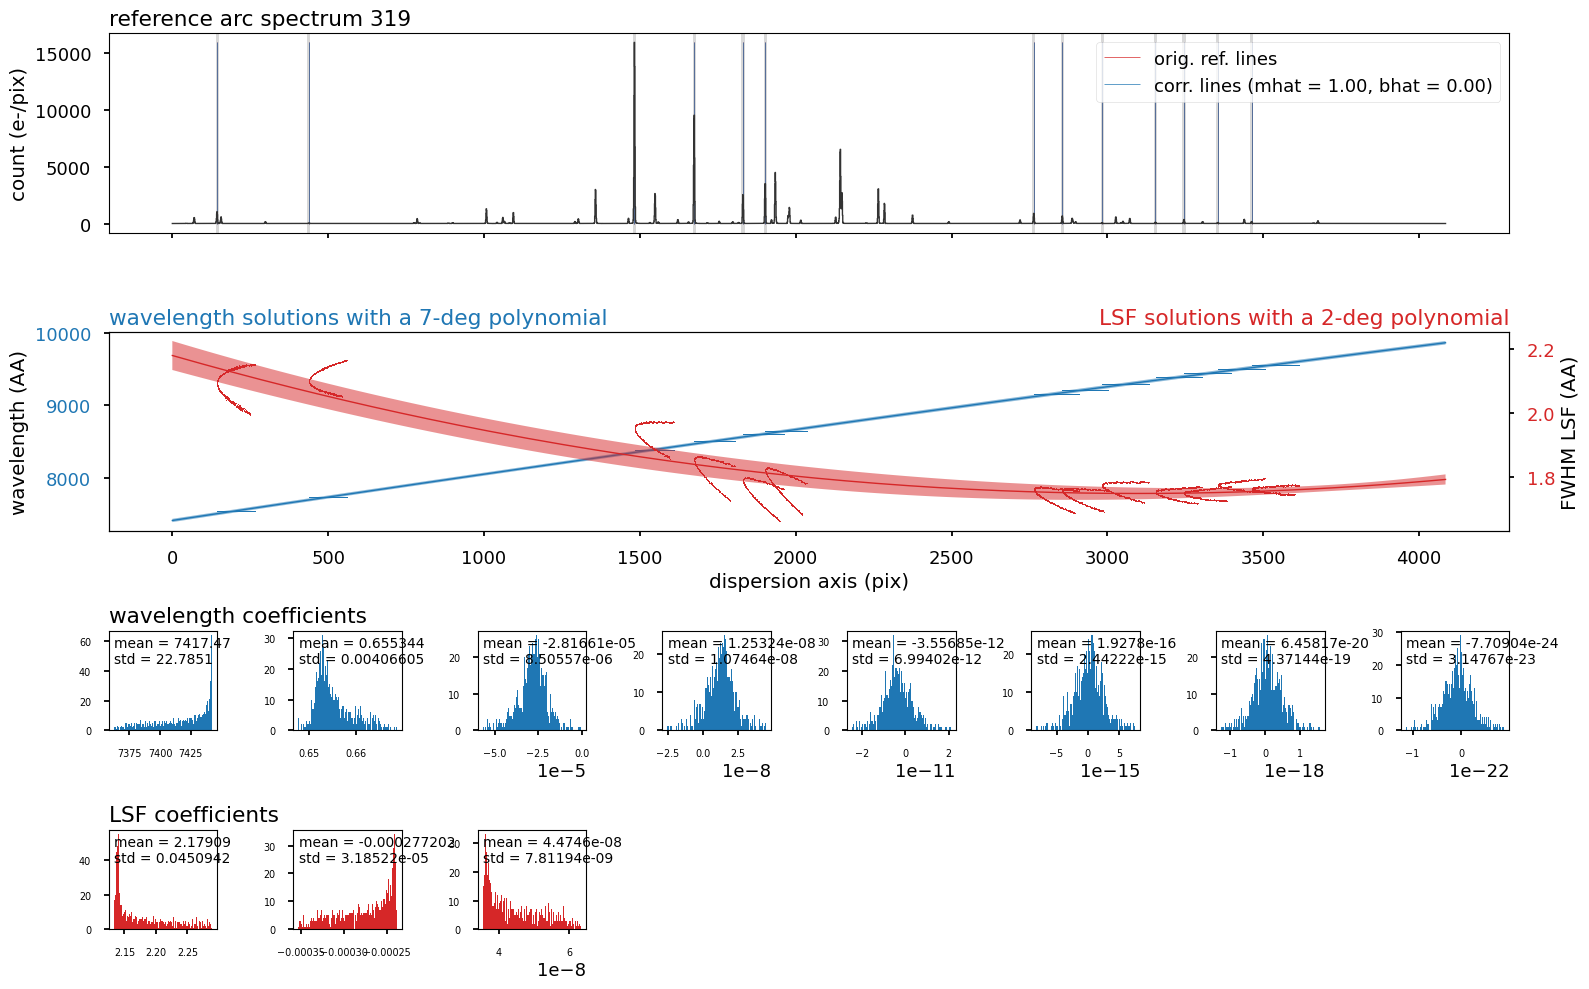

[INFO]: updating header and writing wavelength/LSF to '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mwave_neon-z3.fits' and '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/lco_com/data_calib/60177/lvm-mlsf_neon-z3.fits'
[INFO]: going to extract metadata from 18 frames
extracting metadata: 100%|###############################################################################| 18/18 [00:00<00:00, 429.14frame/s]
[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/1111/60177/raw_metadata.hdf5
[INFO]: updating metadata store for tileid = 1111 and mjd = 60177 with 6 new rows
[INFO]: final number of rows 558
[INFO]: writing raw metadata store to disk
[INFO]: loading metadata store at /home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/data.sdss5.org/sas/sdsswork/lvm/spectro/redux/0.1.1.dev0/master_metadata.hdf5
[INFO]: updating metadata store for 

<Figure size 1040x715 with 0 Axes>

In [5]:
ref_fibers = {"r2": 330, "r1": 319, "r3": 319, "z1": 319, "z2": 319, "z3": 319, "b3": 319, "b2": 319, "b1": 319}


mwaves, mlsfs = [], []
for camera in sorted(ref_fibers):
    # if camera != "z3": continue
    if camera[0] == "b":
        lamp = "hgne"
        marc = masters_arc.query("camera == @camera & hgne").squeeze()
    else:
        lamp = "neon"
        marc = masters_arc.query("camera == @camera & neon").squeeze()
    
    mtrace = os.path.join(masters_path, f"lvm-mtrace-{marc.camera}.fits")
    
    mpath = os.path.join(masters_path, f"lvm-marc_{lamp}-{marc.camera}.fits")
    xpath = os.path.join(masters_path, f"lvm-xmarc_{lamp}-{marc.camera}.fits")
    mwave = os.path.join(masters_path, f"lvm-mwave_{lamp}-{marc.camera}.fits")
    mlsf = os.path.join(masters_path, f"lvm-mlsf_{lamp}-{marc.camera}.fits")
    wpath = os.path.join(masters_path, f"lvm-wmarc_{lamp}-{marc.camera}.fits")

    _, _, _, _, use_lines = rss._read_pixwav_map(lamp=lamp, camera=marc.camera)
    poly_deg = use_lines.sum() // 2 + 1
    
    # extract arc
    imageMethod.extract_spectra(in_image=mpath, out_rss=xpath, in_trace=mtrace, method="aperture", aperture=3)
    # determine wavelength solutions
    rssMethod.determine_wavelength_solution(in_arcs=xpath, out_wave=mwave, out_lsf=mlsf, ref_fiber=ref_fibers.get(marc.camera, 319), aperture=12, cc_correction=True,
                                            poly_disp=poly_deg, poly_fwhm=2, poly_cros=2, flux_min=1e-12, fwhm_max=5, rel_flux_limits=[0.001, 1e12], display_plots=True)
    
    mwaves.append(mwave)
    mlsfs.append(mlsf)
    # create pixel table
    iwave, fwave = SPEC_CHANNELS[marc.camera[0]]
    rssMethod.create_pixel_table(in_rss=xpath, out_rss=wpath, arc_wave=mwave, arc_fwhm=mlsf)
    # resample
    rssMethod.resample_wavelength(in_rss=wpath, out_rss=wpath, method="linear", disp_pix=0.5, start_wave=iwave, end_wave=fwave, err_sim=10, parallel=0, extrapolate=False)
    
new_masters = md.extract_metadata(frames_paths=mwaves+mlsfs)
md.add_masters(new_masters)